<a href="https://colab.research.google.com/github/Philliec459/STS-Software-to-Download-and-Process-NASA-PACE-Ocean-Ecosystem-hyperspectral-data/blob/main/CoLab_%20netCDF4_PACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**If using CoLab download your data and any necessarey python libraries:**


# Download and Visualize NASA PACE data using python. For this Notebook we are using HyperCoast to download the PACE data.

## This notebook demonstrates methods to download and visualize Plankton, Aerosol, Cloud, ocean Ecosystem (PACE) data.

[PACE Home Page:](https://pace.gsfc.nasa.gov)
---

In [1]:
using_colab = True

In [2]:
if using_colab:

    #!wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/raw/main/Robinson_Preserve_landsat_Band_4.TIF'
    #!wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/raw/main/Robinson_Preserve_landsat_Band_5.TIF'
    #!wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-Landsat-Data-to-Calculate-NDVI-and-PNDVI/raw/main/Clipped_Mangroves_Robinson_Preserve.geojson'


    #https://colab.research.google.com/github/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb

    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx

    %pip install "hypercoast[extra]"
    !pip install netCDF4
    #!pip install --upgrade scikit-learn
    !pip install cartopy
    !pip install mplcursors
    !pip install ipywidgets
    !pip install re
    #!pip install re


In [3]:
# %pip install "hypercoast[extra]"

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import hypercoast
import netCDF4 as nc

import cartopy  #!pip install cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import cartopy.feature
import mplcursors
import ipywidgets as widgets


# **Option 1: For the first time, use the GeoSpatial's HyperCoast .nc file that they provide from their site.**
---

# **Option 2: For all the PACE data use NASA's Earth Data to download using HyperCoast:**
---
This is the best way to downlad and process PACE data in general.

    **Searching and downloading NASA Earth science data products**

    Leafmap builds upon the [earthaccess](https://earthaccess.readthedocs.io) Python package to search and download NASA Earth science data products, making it easier visualize the footprints of the data products and download them interactively.

    To download and access the data, you will need to create an Earthdata login. You can register for an account at [urs.earthdata.nasa.gov](https://urs.earthdata.nasa.gov).


# **Option 3: Use May 21 PACE Data as a work file after downloading from Option 2:**
---

In [5]:
# Create a Label widget for the description
print("Select PACE Data Source:")



rdbuttons = widgets.RadioButtons(
    options = ['GeoSpatial','NASA','May12','May21'],
    value='GeoSpatial',
    layout={'widdt':'max-content'},
    description = 'PACE Data Source',
    disabled=False
)


rdbuttons

Select PACE Data Source:


RadioButtons(description='PACE Data Source', options=('GeoSpatial', 'NASA', 'May12', 'May21'), value='GeoSpati…

# **If you want to use NASA PACE files, then check the appropriate NASA box above, and then run all from this line and all below:**
---

In [6]:
source=rdbuttons.value
print("Select PACE Data Source:", source)
print()


if source == 'GeoSpatial':
    url = "https://github.com/opengeos/datasets/releases/download/netcdf/PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc"
    filepath = "PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc"
    hypercoast.download_file(url)
    print("Using GeoSpatial PACE file")

if source == 'May21':
    filepath = './data/PACE_OCI.20240521T184116.L2.OC_AOP.V1_0_0.NRT.nc'

if source == 'May12':
    filepath = './data/PACE_OCI.20240512T182218.L2.OC_AOP.V1_0_0.NRT.nc'


Select PACE Data Source: GeoSpatial

PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc already exists. Skip downloading. Set overwrite=True to overwrite.
Using GeoSpatial PACE file


In [7]:
if source == 'NASA':


    hypercoast.nasa_earth_login()

You can search data by short name, doi, concept id, etc. You can find the list of NASA Earth science data products from the [NASA-Earth-Data](https://github.com/opengeos/NASA-Earth-Data) repo. The example below shows how to show the metadata of the 9,000+ NASA Earth science data products.

In [8]:
if source == 'NASA':


    url = "https://github.com/opengeos/NASA-Earth-Data/raw/main/nasa_earth_data.tsv"
    df = pd.read_csv(url, sep="\t")
    df

To search data, specify the short name, bounding box, date range, etc. To return the footprints of the data, set `return_gdf=True`.

In [9]:
if source == 'NASA':



    results, gdf = hypercoast.search_pace(
        bounding_box=(-83, 25, -81, 28),
        temporal=("2024-05-10", "2024-12-31"),
        count=-1,  # use -1 to return all datasets
        return_gdf=True,
    )

Visualize the footprints of the data on an interactive map.

In [10]:
if source == 'NASA':


    gdf.explore()

Download the data to your local drive. Let's download the first 20 data products.

In [11]:
if source == 'NASA':

    hypercoast.download_pace(results[:30], out_dir="data")

# **Load and Plot your Selected Hyperspectral PACE data:**

In [12]:
def list_nc_files_with_sizes_and_dates(directory):
    """List all .nc files in the given directory along with their sizes and dates."""
    files_with_sizes_and_dates = []
    for file in os.listdir(directory):
        if file.endswith('.nc'):
            # Extract date from file name
            match = re.search(r'\d{8}', file)
            if match:
                date_str = match.group(0)
                # Parse the date string into a tuple (year, month, day)
                date_tuple = (int(date_str[:4]), int(date_str[4:6]), int(date_str[6:8]))
                file_path = os.path.join(directory, file)
                file_size = os.path.getsize(file_path)
                files_with_sizes_and_dates.append((file, file_size, date_tuple))
    return files_with_sizes_and_dates

def display_menu(files_with_sizes_and_dates):
    """Display a menu of files for the user to choose from, including their sizes in MB and dates."""
    print("Please choose a file from the list below:")
    for idx, (file, size, date) in enumerate(files_with_sizes_and_dates):
        size_mb = size / 1_000_000  # Convert size to MB using decimal units
        #print(f"File #{idx + 1}: {file} (Size: {size_mb:,.1f} MB, Date: {date[0]}-{date[1]:02}-{date[2]:02})")
        print(f"File #{idx + 1}: {file} ({idx+1}, Size: {size_mb:,.1f} MB, Date: {date[0]}-{date[1]:02}-{date[2]:02})")

def get_user_choice(files_with_sizes_and_dates):
    """Get the user's choice and return the selected file path."""
    while True:
        try:
            choice = int(input("Enter the number of the file you want to choose: "))
            if 1 <= choice <= len(files_with_sizes_and_dates):
                return files_with_sizes_and_dates[choice - 1][0]  # Return the chosen file name
            else:
                print(f"Invalid choice. Please enter a number between 1 and {len(files_with_sizes_and_dates)}.")
        except ValueError:
            print("Invalid input. Please enter a number.")

if source == 'NASA':


    # Specify the directory
    directory = "data"

    # List all .nc files in the directory with their sizes and dates
    nc_files_with_sizes_and_dates = list_nc_files_with_sizes_and_dates(directory)

    # Sort files by date (oldest to newest)
    nc_files_with_sizes_and_dates.sort(key=lambda x: x[2])

    # Display the menu
    display_menu(nc_files_with_sizes_and_dates)

    # Get the user's choice
    chosen_file = get_user_choice(nc_files_with_sizes_and_dates)

    # Construct the full file path
    filepath = os.path.join(directory, chosen_file)

    # Print the chosen file path (or you can proceed with reading the file)
    print(f"Chosen file path: {filepath}")
    print()
    print("Using NASA PACE files")

dataset = nc.Dataset(filepath, 'r')













'''
This is key to initializing our primary variables below:
'''

lat = dataset.groups['navigation_data'].variables['latitude'][:]
lon = dataset.groups['navigation_data'].variables['longitude'][:]
wavelengths = dataset['sensor_band_parameters']['wavelength'][:184]  # Adjust based on identified variable names and ensure it matches the 184 wavelength channels
reflectance_data = dataset['geophysical_data']['Rrs'][:]  # Adjust based on identified variable names















# Map of PACE data
from ipywidgets import interact, FloatRangeSlider, Layout, FloatSlider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter




def Map_Reflectance_widget(lon_slide, lat_slide, target_wavelength):

    wavelength_index = np.argmin(np.abs(wavelengths - target_wavelength))
    reflectance_at_target = reflectance_data[:, :, wavelength_index]



    # Plot histogram of the data
    plt.figure(figsize=(10, 1))
    plt.hist(reflectance_at_target.flatten(), bins=100, range=(0.0, 0.02),color='blue', edgecolor='black')
    #plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.xlabel(f'Reflectance')
    plt.ylabel('Frequency')
    plt.title(f'Reflectance at {target_wavelength} nm')
    plt.grid(True)
    #plt.show()



    # Plot the reflectance
    plt.figure(figsize=(9, 9))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)

    low_lat, high_lat = lat_slide
    low_lon, high_lon = lon_slide

    ax.set_extent([low_lon, high_lon, low_lat, high_lat], crs=ccrs.PlateCarree())  # Florida region

    # Add Natural Earth features for the basemap
    ax.add_feature(cfeature.LAND)
    #####ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    #######ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Plot the reflectance data using pcolormesh
    im = ax.pcolormesh(lon, lat, reflectance_at_target, vmin=0, vmax=0.02, cmap='rainbow', transform=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.STATES, linewidth=0.5)

    # Set ticks and format them
    ax.set_xticks(np.linspace(low_lon, high_lon, 5), crs=map_projection)
    ax.set_yticks(np.linspace(low_lat, high_lat, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    plt.title(f'Reflectance at {target_wavelength} nm')
    #plt.colorbar(im, orientation='horizontal', label=f'Reflectance at {target_wavelength} nm')
    #label='Log10 Chlorophyll a concentration (mg/m^3)'
    #plt.colorbar(im, orientation='horizontal',label=f'Reflectance')
    cbar = plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=40, fraction=0.02, label='Reflectance')
    plt.tight_layout()
    plt.show()



# Define the range sliders for zooming (x and y limits)
lon_slider = FloatRangeSlider(
    value = [-91, -77],
    min = -98,
    max = -75,
    step = 0.1,
    description='lon:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

lat_slider = FloatRangeSlider(
    value = [22, 34],
    min = 20,
    max = 35,
    step = 0.1,
    description='lat:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

# Define the available wavelengths
available_wavelengths = np.array([315, 316, 318, 320, 322, 325, 327, 329, 331, 334, 337, 339, 341, 344, 346, 348, 351, 353,
                                  356, 358, 361, 363, 366, 368, 371, 373, 375, 378, 380, 383, 385, 388, 390, 393, 395, 398,
                                  400, 403, 405, 408, 410, 413, 415, 418, 420, 422, 425, 427, 430, 432, 435, 437, 440, 442,
                                  445, 447, 450, 452, 455, 457, 460, 462, 465, 467, 470, 472, 475, 477, 480, 482, 485, 487,
                                  490, 492, 495, 497, 500, 502, 505, 507, 510, 512, 515, 517, 520, 522, 525, 527, 530, 532,
                                  535, 537, 540, 542, 545, 547, 550, 553, 555, 558, 560, 563, 565, 568, 570, 573, 575, 578,
                                  580, 583, 586, 588, 591, 593, 596, 598, 601, 603, 605, 608, 610, 613, 615, 618, 620, 623,
                                  625, 627, 630, 632, 635, 637, 640, 641, 642, 643, 645, 646, 647, 648, 650, 651, 652, 653,
                                  655, 656, 657, 658, 660, 661, 662, 663, 665, 666, 667, 668, 670, 671, 672, 673, 675, 676,
                                  677, 678, 679, 681, 682, 683, 684, 686, 687, 688, 689, 691, 692, 693, 694, 696, 697, 698,
                                  699, 701, 702, 703])


# Create the wavelength selection slider
wave_slider = widgets.SelectionSlider(
    options=available_wavelengths,
    value=315,
    description='Wavelength:',
    continuous_update=True,
    layout=Layout(width='50%')  # Adjust width of the slider
)

# Create the interactive widget
ndvi_interactive = interact(
    Map_Reflectance_widget,
    #range_values=ndvi_range_slider,
    lon_slide = lon_slider,
    lat_slide = lat_slider,
    target_wavelength = wave_slider
)



interactive(children=(FloatRangeSlider(value=(-91.0, -77.0), continuous_update=False, description='lon:', layo…

# **What is contained in our selected .nc data file:**
---

The *.nc files you're referring to are NetCDF (Network Common Data Form) files. NetCDF is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. Here's a bit more detail on what these files are and how they are typically used:

### What is a NetCDF File?

1. **Format**: NetCDF files are designed to store large arrays of scientific data. They can handle complex data structures, including multidimensional arrays, and can contain metadata that describes the data contained within the file.

2. **Usage**: These files are commonly used in the fields of meteorology, oceanography, and climate science to store observational data, model outputs, and other types of scientific data. NASA's PACE (Plankton, Aerosol, Cloud, ocean Ecosystem) mission, which aims to provide advanced measurements of ocean color, aerosol, and cloud properties, uses NetCDF files to distribute its data.

3. **Data Access and Manipulation**: NetCDF files can be accessed and manipulated using a variety of software tools and programming languages, including:
   - **Python**: Libraries such as `netCDF4`, `xarray`, and `h5netcdf` are commonly used to read and manipulate NetCDF files.
   - **MATLAB**: Provides built-in support for reading and writing NetCDF files.
   - **R**: Packages like `ncdf4` and `RNetCDF` are used for working with NetCDF data.
   - **Command-line Tools**: The NetCDF library provides command-line utilities like `ncdump` and `ncgen` for examining and creating NetCDF files.

### Key Features of NetCDF Files

1. **Self-describing**: NetCDF files contain metadata that describes the contents of the file, such as the dimensions, variables, and attributes. This self-describing nature makes it easier to understand the data without needing external documentation.

2. **Portable**: NetCDF is designed to be machine-independent, meaning the same file can be read on different types of computer systems without modification.

3. **Efficient Access**: The format allows for efficient access to subsets of large datasets, which is crucial for working with large volumes of scientific data.

### Working with NetCDF Files

A practical example of how you might work with NetCDF files using Python, here is a simple code snippet using the `netCDF4` library:

```python
import netCDF4 as nc

# Open a NetCDF file
dataset = nc.Dataset('path_to_your_file.nc')

# Explore the dimensions
print(dataset.dimensions)

# Explore the variables
print(dataset.variables)

# Access a specific variable
temperature = dataset.variables['temperature'][:]

# Close the dataset
dataset.close()
```

In this snippet, replace `'path_to_your_file.nc'` with the actual path to your NetCDF file. You can explore the structure of the dataset, including its dimensions and variables, and extract the data for analysis.

NetCDF files are a powerful tool for managing complex scientific data, and their wide adoption across various scientific disciplines attests to their versatility and robustness.

We found the following code used to exploer our NetCDF data:

    Author: Guoqing Wang (guoqing.wang@nasa.gov), OB.DAAC Scientist, NASA GSFC; SSAI



## **1. Loading the Level-2 Dataset** <br>
---

    Author: Guoqing Wang (guoqing.wang@nasa.gov), OB.DAAC Scientist, NASA GSFC; SSAI


NASA ocean color data are stored in NetCDF files. They can be read with a few different Python modules. The most popular are netCDF4 and gdal. For this script we’ll focus on netCDF4.<br>
Loading a dataset is simple, just pass a NetCDF file path to netCDF4.Dataset().

In [13]:
# open file and print the metadata
#dataset = nc.Dataset(filepath, 'r')

A NetCDF file consists of three fundamental components: metadata, dimensions, and variables. Variables encompass both metadata and data. The netCDF4 library enables us to retrieve the metadata and data linked to a NetCDF file.

## **2. Retrieve Metadata**
---

<br>When we print the dataset f, it provides details about the variables present in the file as well as the groups of variables.

In [14]:
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: OCI Level-2 Data
    product_name: PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc
    processing_version: V1.0.0
    history: l2gen par=/data5/sdpsoper/vdc/vpu24/workbuf/PACE_OCI.20240423T184658.L1B.nc.param metafile=PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc.meta
    instrument: OCI
    platform: PACE
    Conventions: CF-1.6 ACDD-1.3
    license: https://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.sci.oceandata
    id: V1.0.0/L2/PACE_OCI.20240423T184658.L2.OC_AOP.V1_0_0.NRT.nc
    date_created: 2024-04-23T20:49:05.000Z
    standard_name_vocabulary: CF Standard Name Table v36
    institution: NASA Goddard Space Flight Center, Ocean Ecology Laboratory, Ocean Biology Processing Group
    creator_name: NASA/GSFC/OBPG
    creator_email: data@oceancolor.gsfc.nasa.gov
    creator_url: https://oceandata.sci.gsfc.nasa.gov
  

## **3. Dimensions**
---
<br>Accessing dimensions is akin to accessing file metadata. Each dimension is stored as a dimension class that holds relevant information. To retrieve metadata for all dimensions, one can loop through all the available dimensions, as demonstrated below.

In [15]:
for dim in dataset.dimensions.values():
    print(dim)


<class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_lines', size = 1710
<class 'netCDF4._netCDF4.Dimension'>: name = 'pixels_per_line', size = 1272
<class 'netCDF4._netCDF4.Dimension'>: name = 'bands_per_pixel', size = 286
<class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_reflectance_location_values', size = 10
<class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_cloud_phases', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'pixel_control_points', size = 1272
<class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_bands', size = 286
<class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_reflective_bands', size = 286
<class 'netCDF4._netCDF4.Dimension'>: name = 'wavelength_3d', size = 184


## **4. Variable Metadata** <br>
---
Access variable metadata in the groups of "geophysical_data" and "navigation_data".

In [16]:
#print(f.groups['geophysical_data'].variables)
# if you just want to see the variable names, use the following code
print(dataset.groups['geophysical_data'].variables.keys())

dict_keys(['Rrs', 'Rrs_unc', 'aot_865', 'angstrom', 'avw', 'l2_flags'])


## **5. Access Data Values**
---
<br>The actual precipitation data values are accessed by array indexing, and a numpy array is returned. All variable data is returned as follows:

In [17]:
# metadata of variable: chlor_a
print(dataset.groups['geophysical_data'].variables['Rrs'])

<class 'netCDF4._netCDF4.Variable'>
int16 Rrs(number_of_lines, pixels_per_line, wavelength_3d)
    long_name: Remote sensing reflectance
    scale_factor: 2e-06
    add_offset: 0.05
    units: sr^-1
    standard_name: surface_ratio_of_upwelling_radiance_emerging_from_sea_water_to_downwelling_radiative_flux_in_air
    _FillValue: -32767
    valid_min: -30000
    valid_max: 25000
path = /geophysical_data
unlimited dimensions: 
current shape = (1710, 1272, 184)
filling on


## **6. Visualization and mapping**
---

<br>Here, we use cartopy for basemap creation and matplotlib to plot data onto the created map.
The combination of Matplotlib and Cartopy provides a powerful toolkit for creating geospatial visualizations.

this is a test below by lat and lon for different samples

## Non-Interactive Maps at chosen wavelength with lat-lon targets and wavelenth plot at that target:

### The wavelength plots are interesting as well as target located on map too.

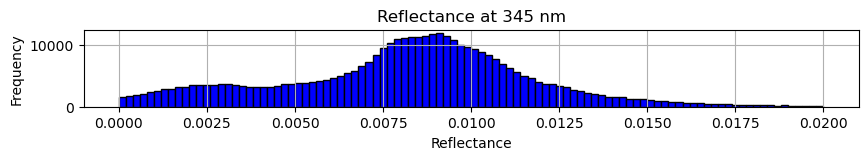

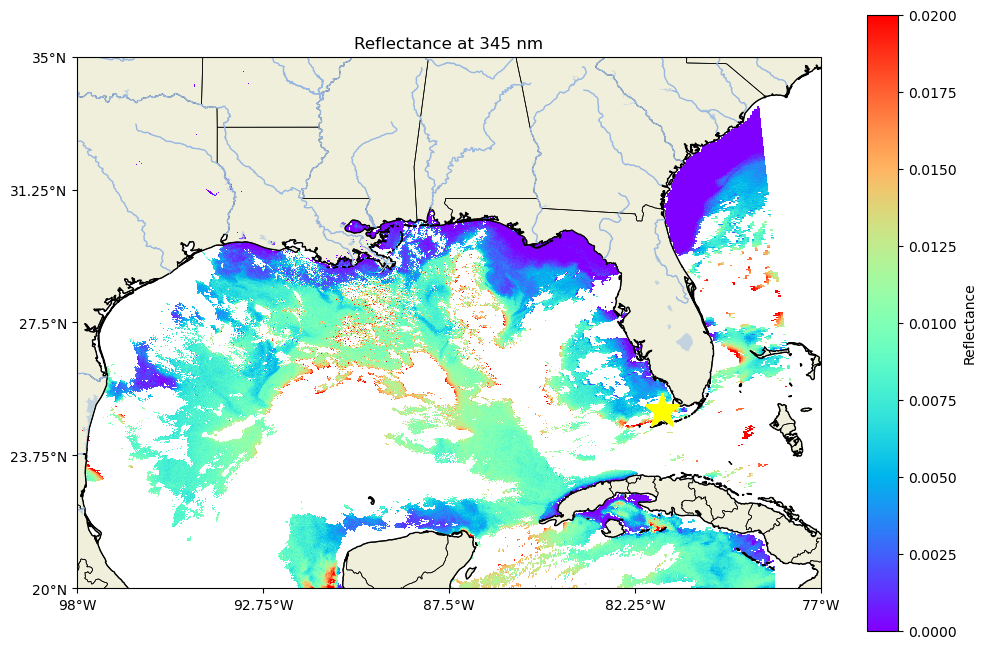

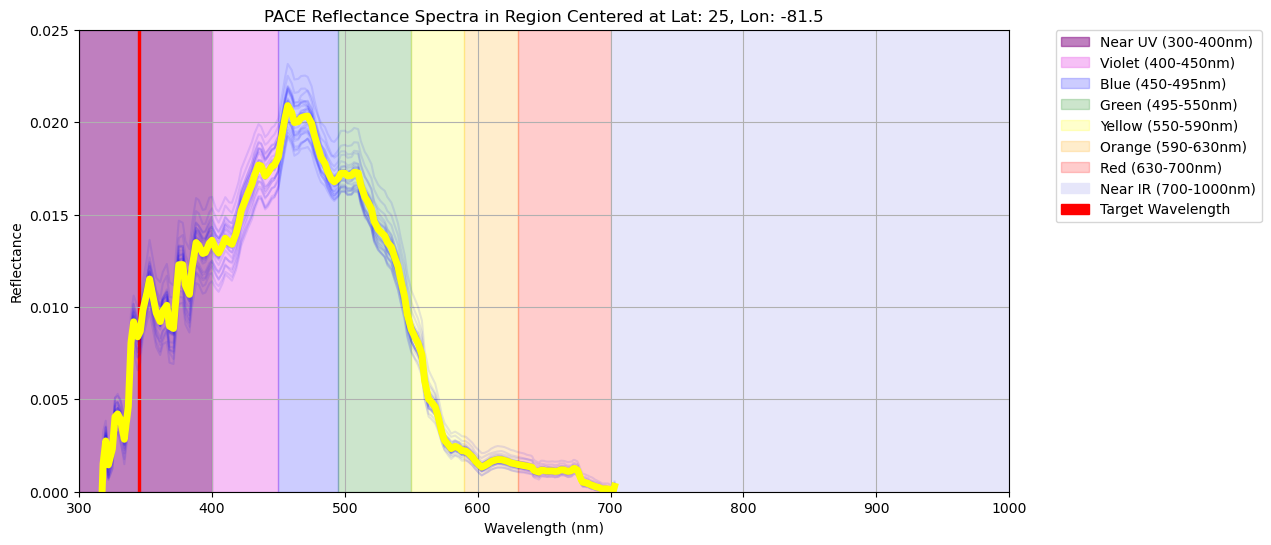

In [18]:
# Best

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter


def find_closest_grid_point(lat, lon, latitude, longitude):
    distances = np.sqrt((lat - latitude)**2 + (lon - longitude)**2)
    min_distance_idx = np.unravel_index(np.argmin(distances), distances.shape)
    return min_distance_idx

def plot_data(lon, lat, target_wavelength, latitude, longitude, delta):
    wavelength_index = np.argmin(np.abs(wavelengths - target_wavelength))
    reflectance_at_target = reflectance_data[:, :, wavelength_index]

    # Plot histogram of the data
    plt.figure(figsize=(10, 1))
    plt.hist(reflectance_at_target.flatten(), bins=100, range=(0.0, 0.02), color='blue', edgecolor='black')
    plt.xlabel('Reflectance')
    plt.ylabel('Frequency')
    plt.title(f'Reflectance at {target_wavelength} nm')
    plt.grid(True)
    plt.show()

    # Define the range for the target region
    lat_range = [latitude - delta, latitude + delta]
    lon_range = [longitude - delta, longitude + delta]

    # Plot reflectance map for the larger region, showing the target location
    plt.figure(figsize=(12, 8))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region
    im = ax.pcolormesh(lon, lat, reflectance_at_target, vmin=0.0, vmax=0.02, cmap='rainbow')

    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)
    ax.plot(longitude, latitude, marker='*', markersize=26, color='yellow')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.RIVERS)
    ######ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-98, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)





    ax.plot(longitude, latitude, marker='*', markersize=26, color='yellow')
    plt.colorbar(im, label='Reflectance')
    plt.title(f'Reflectance at {target_wavelength} nm')
    plt.show()

    # Find grid points within the specified range
    lat_mask = (lat >= lat_range[0]) & (lat <= lat_range[1])
    lon_mask = (lon >= lon_range[0]) & (lon <= lon_range[1])
    combined_mask = lat_mask & lon_mask

    # Extract reflectance data for all grid points within the specified range
    reflectance_spectra = reflectance_data[combined_mask, :]

    # Calculate the mean reflectance spectrum
    mean_reflectance_spectrum = np.mean(reflectance_spectra, axis=0)



    # Plot all reflectance spectra within the specified range
    plt.figure(figsize=(12, 6))
    for spectrum in reflectance_spectra:
        plt.plot(wavelengths, spectrum, color='blue', alpha=0.1)  # Set alpha for better visibility

    plt.plot(wavelengths, mean_reflectance_spectrum, color='yellow', linewidth=5)

    plt.ylim(0, 0.025)
    plt.xlim(300, 1000)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance')
    plt.title(f'PACE Reflectance Spectra in Region Centered at Lat: {latitude}, Lon: {longitude}')
    plt.axvspan(300, 400, alpha=0.5, color='purple', label='Near UV (300-400nm)')
    plt.axvspan(400, 450, alpha=0.5, color='violet', label='Violet (400-450nm)')
    plt.axvspan(450, 495, alpha=0.2, color='blue', label='Blue (450-495nm)')
    plt.axvspan(495, 550, alpha=0.2, color='green', label='Green (495-550nm)')
    plt.axvspan(550, 590, alpha=0.2, color='yellow', label='Yellow (550-590nm)')
    plt.axvspan(590, 630, alpha=0.2, color='orange', label='Orange (590-630nm)')
    plt.axvspan(630, 700, alpha=0.2, color='red', label='Red (630-700nm)')
    plt.axvspan(700, 1000, alpha=1, color='lavender', label='Near IR (700-1000nm)')

    plt.axvspan(target_wavelength-1, target_wavelength+1, alpha=1, color='red', label = 'Target Wavelength')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.show()

# Example usage
plot_data(lon, lat, target_wavelength=345, latitude=25, longitude=-81.5, delta=0.05)


## Heatmap of wavelength plot:

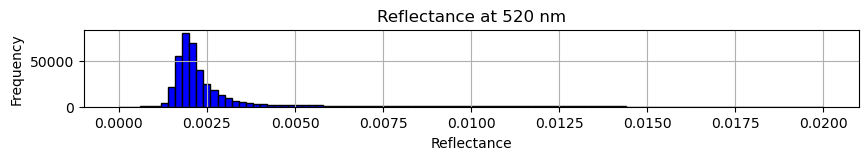

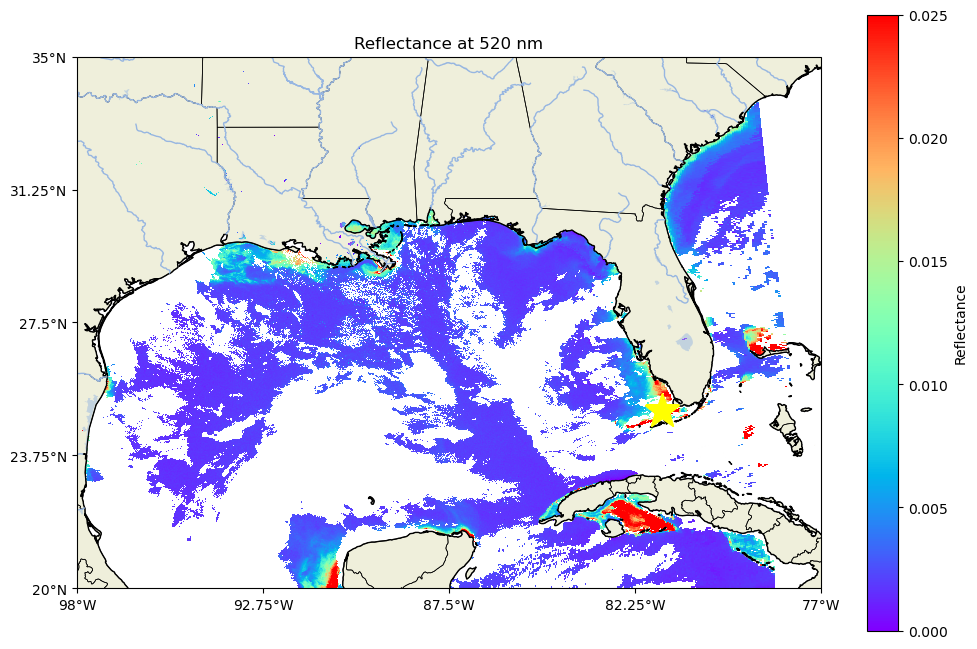

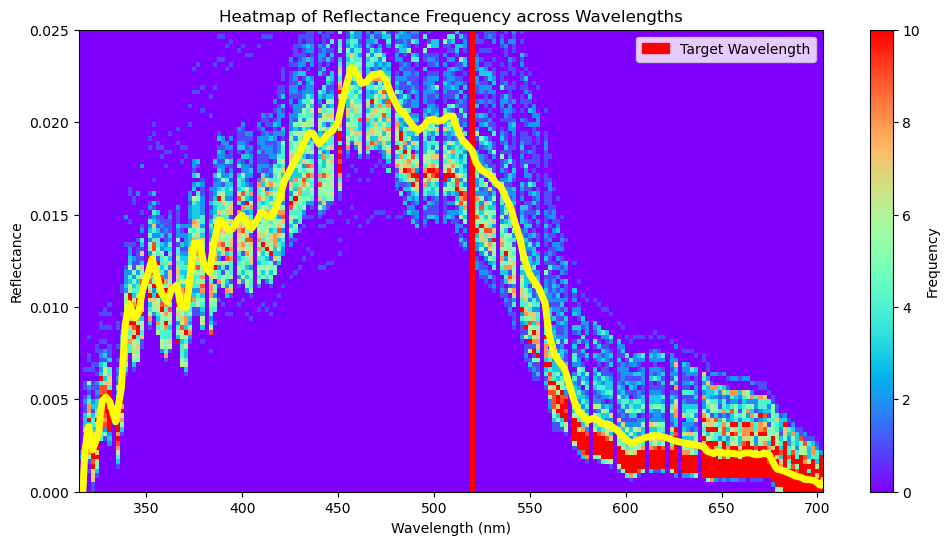

In [19]:
# Heatmap of spectra- great

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter



lat = dataset.groups['navigation_data'].variables['latitude'][:]
lon = dataset.groups['navigation_data'].variables['longitude'][:]
wavelengths = dataset['sensor_band_parameters']['wavelength'][:184]  # Adjust based on identified variable names and ensure it matches the 184 wavelength channels
reflectance_data = dataset['geophysical_data']['Rrs'][:]  # Adjust based on identified variable names




def find_closest_grid_point(lat, lon, latitude, longitude):
    distances = np.sqrt((lat - latitude)**2 + (lon - longitude)**2)
    min_distance_idx = np.unravel_index(np.argmin(distances), distances.shape)
    return min_distance_idx

def plot_data(lon, lat, target_wavelength, latitude, longitude, delta):
    wavelength_index = np.argmin(np.abs(wavelengths - target_wavelength))
    reflectance_at_target = reflectance_data[:, :, wavelength_index]

    # Plot histogram of the data
    plt.figure(figsize=(10, 1))
    plt.hist(reflectance_at_target.flatten(), bins=100, range=(0.0, 0.02), color='blue', edgecolor='black')
    plt.xlabel('Reflectance')
    plt.ylabel('Frequency')
    plt.title(f'Reflectance at {target_wavelength} nm')
    plt.grid(True)
    plt.show()

    # Define the range for the target region
    lat_range = [latitude - delta, latitude + delta]
    lon_range = [longitude - delta, longitude + delta]

    # Plot reflectance map for the larger region, showing the target location
    plt.figure(figsize=(12, 8))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region
    im = ax.pcolormesh(lon, lat, reflectance_at_target, vmin=0.0, vmax=0.025, cmap='rainbow')

    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)
    ax.plot(longitude, latitude, marker='*', markersize=26, color='yellow')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.RIVERS)
    ######ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-98, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)



    ax.plot(longitude, latitude, marker='*', markersize=26, color='yellow')
    plt.colorbar(im, label='Reflectance')
    plt.title(f'Reflectance at {target_wavelength} nm')
    plt.show()

    # Find grid points within the specified range
    lat_mask = (lat >= lat_range[0]) & (lat <= lat_range[1])
    lon_mask = (lon >= lon_range[0]) & (lon <= lon_range[1])
    combined_mask = lat_mask & lon_mask

    # Extract reflectance data for all grid points within the specified range
    reflectance_spectra = reflectance_data[combined_mask, :]



    # Create arrays for 2D histogram
    all_wavelengths = np.tile(wavelengths, reflectance_spectra.shape[0])
    all_reflectance = reflectance_spectra.flatten()

    # Create the 2D histogram
    hist, xedges, yedges = np.histogram2d(all_wavelengths, all_reflectance, bins=[len(wavelengths), 100], range=[[wavelengths.min(), wavelengths.max()], [0, 0.025]])

    # Plot the 2D histogram as a heatmap
    fig, ax = plt.subplots(figsize=(12, 6))
    X, Y = np.meshgrid(xedges, yedges)

    mean_reflectance_spectrum = np.mean(reflectance_spectra, axis=0)
    ax.plot(wavelengths, mean_reflectance_spectrum, color='yellow', linewidth=5)



    pcm = ax.pcolormesh(X, Y, hist.T, shading='auto', cmap='rainbow', vmin=0, vmax=10)
    cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', label='Frequency')


    plt.axvspan(target_wavelength-1, target_wavelength+1, alpha=1, color='red', label = 'Target Wavelength')
    plt.legend()



    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Reflectance')
    ax.set_ylim(0., 0.025)
    plt.title('Heatmap of Reflectance Frequency across Wavelengths')
    plt.show()

# Example usage
plot_data(lon, lat, target_wavelength=520, latitude=25, longitude=-81.5, delta=0.15)


## Interactive Method for Target Selection:

In [20]:
from ipywidgets import interact, FloatRangeSlider, Layout, FloatSlider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter



def find_closest_grid_point(lat_slide, lon_slide):
    distances = np.sqrt((lat - latitude)**2 + (lon - longitude)**2)
    min_distance_idx = np.unravel_index(np.argmin(distances), distances.shape)
    return min_distance_idx

def plot_data(target_wavelength, longitude, latitude ):

    #target_wavelength = target_wave

    wavelength_index = np.argmin(np.abs(wavelengths - target_wavelength))
    reflectance_at_target = reflectance_data[:, :, wavelength_index]

    delta=0.25
    # Define the range for the target region
    lat_range = [latitude - delta, latitude + delta]
    lon_range = [longitude - delta, longitude + delta]


    # Find grid points within the specified range
    lat_mask = (lat >= lat_range[0]) & (lat <= lat_range[1])
    lon_mask = (lon >= lon_range[0]) & (lon <= lon_range[1])
    combined_mask = lat_mask & lon_mask

    # Extract reflectance data for all grid points within the specified range
    reflectance_spectra = reflectance_data[combined_mask, :]

    # Create arrays for 2D histogram
    all_wavelengths = np.tile(wavelengths, reflectance_spectra.shape[0])
    all_reflectance = reflectance_spectra.flatten()

    # Create the 2D histogram
    hist, xedges, yedges = np.histogram2d(all_wavelengths, all_reflectance, bins=[len(wavelengths), 100], range=[[wavelengths.min(), wavelengths.max()], [0, 0.03]])

    # Plot the 2D histogram as a heatmap
    fig, ax = plt.subplots(figsize=(12, 4))
    X, Y = np.meshgrid(xedges, yedges)

    mean_reflectance_spectrum = np.mean(reflectance_spectra, axis=0)
    ax.plot(wavelengths, mean_reflectance_spectrum, color='yellow', linewidth=3, label = 'Mean Reflectance')

    #pcm = ax.pcolormesh(X, Y, hist.T, shading='auto', cmap='rainbow', vmin=0, vmax=10)
    pcm = ax.pcolormesh(X, Y, hist.T, shading='auto', cmap='rainbow', vmin=0, vmax=10)
    cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', label='Frequency')
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Reflectance')
    ax.set_ylim(0., 0.03)

    plt.axvspan(target_wavelength-1, target_wavelength+1, alpha=1, color='red', label = 'Target Wavelength')
    plt.legend()

    plt.title('Heatmap of Reflectance Frequency across all 184 PACE Wavelengths')
    plt.show()





    # Plot reflectance map for the larger region, showing the target location
    plt.figure(figsize=(12, 7))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region
    im = ax.pcolormesh(lon, lat, reflectance_at_target, vmin=0.0, vmax=0.02, cmap='rainbow')

    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)
    ax.plot(longitude, latitude, marker='*', markersize=26, color='black')
    ax.plot(longitude, latitude, marker='*', markersize=15, color='yellow')

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.RIVERS)
    ######ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-98, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    plt.colorbar(im, label='Reflectance')
    plt.title(f'Reflectance at {target_wavelength} nm')
    plt.show()


    # Plot histogram of the data
    plt.figure(figsize=(10, 1))
    plt.hist(reflectance_at_target.flatten(), bins=100, range=(0.0, 0.03), color='blue', edgecolor='black')
    plt.xlabel('Reflectance')
    plt.ylabel('Frequency')
    plt.title(f'Reflectance Histogram at {target_wavelength} nm')
    plt.grid(True)
    plt.show()


# Create the wavelength selection slider
wave_slider = widgets.SelectionSlider(
    options=available_wavelengths,
    value=512,
    description='Wavelength:',
    continuous_update=False,
    layout=Layout(width='50%')  # Adjust width of the slider
)


# Define the range sliders for zooming (x and y limits)
lon_slider = FloatSlider(
    value = -81.19,
    min = -98,
    max = -77,
    step = 0.01,
    description='lon:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

lat_slider = FloatSlider(
    value = 25.5,
    min = 20,
    max = 35,
    step = 0.01,
    description='lat:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)


# Create the interactive widget
ndvi_interactive = interact(
    plot_data,
    #range_values=ndvi_range_slider,
    longitude = lon_slider,
    latitude = lat_slider,
    target_wavelength = wave_slider

)


interactive(children=(SelectionSlider(continuous_update=False, description='Wavelength:', index=81, layout=Lay…

# HyperCube:

This allows you to select targets off of a map and view the wavelength at each target chosen, but this does interupt the flow throught the entire notebook.

In [21]:
from ipywidgets import interact, FloatRangeSlider, Layout, FloatSlider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter



def find_closest_grid_point(lat_slide, lon_slide):
    distances = np.sqrt((lat - latitude)**2 + (lon - longitude)**2)
    min_distance_idx = np.unravel_index(np.argmin(distances), distances.shape)
    return min_distance_idx

def plot_data(target_wavelength, longitude, latitude ):

    #target_wavelength = target_wave

    wavelength_index = np.argmin(np.abs(wavelengths - target_wavelength))
    reflectance_at_target = reflectance_data[:, :, wavelength_index]



    delta=0.25
    # Define the range for the target region
    lat_range = [latitude - delta, latitude + delta]
    lon_range = [longitude - delta, longitude + delta]


    # Find grid points within the specified range
    lat_mask = (lat >= lat_range[0]) & (lat <= lat_range[1])
    lon_mask = (lon >= lon_range[0]) & (lon <= lon_range[1])
    combined_mask = lat_mask & lon_mask

    # Extract reflectance data for all grid points within the specified range
    reflectance_spectra = reflectance_data[combined_mask, :]

    # Create arrays for 2D histogram
    all_wavelengths = np.tile(wavelengths, reflectance_spectra.shape[0])
    all_reflectance = reflectance_spectra.flatten()

    # Create the 2D histogram
    hist, xedges, yedges = np.histogram2d(all_wavelengths, all_reflectance, bins=[len(wavelengths), 100], range=[[wavelengths.min(), wavelengths.max()], [0, 0.03]])

    # Plot the 2D histogram as a heatmap
    fig, ax = plt.subplots(figsize=(12, 4))
    X, Y = np.meshgrid(xedges, yedges)

    mean_reflectance_spectrum = np.mean(reflectance_spectra, axis=0)
    ax.plot(wavelengths, mean_reflectance_spectrum, color='yellow', linewidth=3)

    #pcm = ax.pcolormesh(X, Y, hist.T, shading='auto', cmap='rainbow', vmin=0, vmax=10)
    pcm = ax.pcolormesh(X, Y, hist.T, shading='auto', cmap='rainbow', vmin=0, vmax=10)
    cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', label='Frequency')
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Reflectance')
    ax.set_ylim(0., 0.03)


    # Rrs_678 and Rrs_667 ration and KNDVI
    #nkey wavelengths = [620, 660, 665, 667, 678, 680, 690, 703]
    #            = 620 to 703   for Red Tide indicators mentioned in literature.

    ax.axvspan(620, 703, alpha=0.6, color='yellow', label='Published Red Tide Indicator Wavelengths')
    ax.axvspan(target_wavelength-1, target_wavelength+1, alpha=1, color='red', label='Target Wavelengths')

    plt.legend()
    plt.title('Heatmap of Reflectance Frequency across all 184 PACE Wavelengths')
    plt.show()





    # Plot reflectance map for the larger region, showing the target location
    plt.figure(figsize=(12, 7))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region
    im = ax.pcolormesh(lon, lat, reflectance_at_target, vmin=0.0, vmax=0.02, cmap='rainbow')

    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)
    ax.plot(longitude, latitude, marker='*', markersize=26, color='yellow')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.RIVERS)
    ######ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-98, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    plt.colorbar(im, label='Reflectance')
    plt.title(f'Reflectance at {target_wavelength} nm')
    plt.show()


    # Plot histogram of the data
    plt.figure(figsize=(10, 1))
    plt.hist(reflectance_at_target.flatten(), bins=100, range=(0.0, 0.02), color='blue', edgecolor='black')
    plt.xlabel('Reflectance')
    plt.ylabel('Frequency')
    plt.title(f'Reflectance Histogram at {target_wavelength} nm')
    plt.grid(True)
    plt.show()


# Create the wavelength selection slider
wave_slider = widgets.SelectionSlider(
    options=available_wavelengths,
    value=678,
    description='Wavelength:',
    continuous_update=False,
    layout=Layout(width='50%')  # Adjust width of the slider
)


# Define the range sliders for zooming (x and y limits)
lon_slider = FloatSlider(
    value = -81.19,
    min = -98,
    max = -77,
    step = 0.01,
    description='lon:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

lat_slider = FloatSlider(
    value = 25.5,
    min = 20,
    max = 35,
    step = 0.01,
    description='lat:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)


# Create the interactive widget
ndvi_interactive = interact(
    plot_data,
    #range_values=ndvi_range_slider,
    longitude = lon_slider,
    latitude = lat_slider,
    target_wavelength = wave_slider

)


interactive(children=(SelectionSlider(continuous_update=False, description='Wavelength:', index=163, layout=La…

---
---
# **Chlorophyll_a Calculations using Earth Data Tools Method Data (2023) used with PACE Data**
---

    Viewing Chlorophyll a — Algorithm Publication Tool.pdf

    Jeremy Werdell and John O'Reilly and Chuanmin Hu and Lian Feng and Zhongping Lee and Bryan Franz and Sean Bailey and Christopher Proctor, Chlorophyll a, Earth Data Publications Tool, November 6, 2023

The algorithm proceeds as follows:
1. chlor_a is first calculated using the CI algorithm, which is a three-band reflectance difference algorithm employing the difference between sensor specific Rrs in the green band and a reference formed linearly between Rrs in the blue and red bands (bands are instrument specific - see Table 1):

    CI = Rrs(λgreen) − [Rrs(λblue) + (λgreen − λblue)/(λred − λblue) ∗ (Rrs(λred) − Rrs(λblue))]

Final calculation of CI chlor_a is done using two coefficients (a0CI = -0.4287 and a1CI = 230.47) specified by Hu et al (2019), where:

    chlor_a = 10(a0CI +a1CI ∗CI)

2. chlor_a is then calculated following the OCx algorithm, which is a fourth-order polynomial
relationship between a ratio of Rrs and chlor_a:


# ![image.png](https://github.com/Philliec459/STS-Software-to-Download-and-Process-NASA-PACE-Ocean-Ecosystem-hyperspectral-data/blob/main/Chlora_equation.png?raw=1)

where the numerator, Rrs(λblue), is the greatest of several input Rrs values and the coefficients, a0-a4, are sensor-specific. The coefficients used for the OCx component of the algorithm in standard processing are listed in Table 1 below. In most cases these are taken directly from (O'Reilly & Werdell, 2019).


# ![image.png](https://github.com/Philliec459/STS-Software-to-Download-and-Process-NASA-PACE-Ocean-Ecosystem-hyperspectral-data/blob/main/chart.png?raw=1)

3. For chlor_a retrievals below 0.25 mg m-3, the CI algorithm is used.
For chlor_a retrievals above 0.35 mg m-3, the OCx algorithm is used. In between these values, the CI and OCx algorithm are blended using a weighted approach:
chlor_a = chlor_aCI (t2 − chlor_aCI ) + chlor_aOCx(chlor_aCI − t1) t2 − t1 t2 − t1
with t1 = 0.25, and t2=0.35 (edges of the current blending region).
For the CI algorithm, the nearest band to 443, 555, and 670 nm is used for the blue, green, and red band, respectively, for all sensors. For sensors that do not have a band very close to 555 nm, a correction is performed to shift the nearest green band Rrs to 555 nm. That correction is as follows:
For spectral bands (λ0) in the range of 543 –567 nm, Rrs(λ0) can be converted to Rrs(555) using the following equations, with sw as a threshold value:

If λ0 = 555±2 nm,

    Rrs(555) = Rrs(λ0)

If Rrs(λ0) < sw,

    Rrs(555) = 10(a1∗log10(Rrs(λ0))−b1)


If Rrs(λ0) ≥ sw,

    Rrs(555) = a2 ∗ Rrs(λ0) − b2

For different spectral bands (λ0), sw and a1, b1, a2, and b2 values are shown in Table 2.



In [22]:
#---------------------------------------------------------------------------------------------------#
#------------------------    Primary chlor_a calcs    ----------------------------------------------#
#------------------------     from L2chlor_a.py       ----------------------------------------------#
#------------------------   ocCI, OCx and Blending     ---------------------------------------------#
#---------------------  We added PACE Parameters for OCx   -----------------------------------------#
#---------------------      We changed wavelengths     ---------------------------------------------#
#---------------------------------------------------------------------------------------------------#
def L2chlor_a(Rrs_442, Rrs_490, Rrs_510, Rrs_555, Rrs_670): # originally from HyperCP code snippet L2chlor_a.py
    '''OCx'''
    a0, a1, a2, a3, a4 = 0.32814, -3.20725, 3.22969, -1.36769, -0.81739
    
    
    
    print(f"Rrs_442: min={np.nanmin(Rrs_442)}, max={np.nanmax(Rrs_442)}, mean={np.nanmean(Rrs_442)}")
    print(f"Rrs_490: min={np.nanmin(Rrs_490)}, max={np.nanmax(Rrs_490)}, mean={np.nanmean(Rrs_490)}")
    print(f"Rrs_510: min={np.nanmin(Rrs_510)}, max={np.nanmax(Rrs_510)}, mean={np.nanmean(Rrs_510)}")
   
    
    #######Rrs_blue = np.maximum(np.maximum(Rrs_442, Rrs_490), Rrs_510)
    #Rrs_blue = np.maximum(Rrs_442, Rrs_490)
    #Rrs_blue = Rrs_442
 
 
    Rrs_blue = (Rrs_442 + Rrs_490 + Rrs_510) / 3
    #Rrs_blue = (Rrs_490 + Rrs_510) / 2
    chlor_a_OCx = 10**(a0 +  a1 * (np.log10(Rrs_blue / Rrs_555))    +
                             a2 * (np.log10(Rrs_blue / Rrs_555))**2 +
                             a3 * (np.log10(Rrs_blue / Rrs_555))**3 +
                             a4 * (np.log10(Rrs_blue / Rrs_555))**4 )

    
    ''' CI 
    CI = Rrs(λgreen) − [Rrs(λblue)+ (Rrs(λred) − Rrs(λblue))*(λgreen−λblue)/(λred−λblue)]'''
    CI  = Rrs_555    - (Rrs_442   + (Rrs_670  -  Rrs_442)   *((555 - 442) / (670 - 442)))
    
    chlor_a_CI = 10**(-0.4287 + 230.47 * CI)

    
    # For chlor_a retrievals below 0.25 mg m , the CI algorithm is used - Werdell
    # For chlor_a retrievals above 0.35 mg m , the OCx algorithm is used - Werdell
    # Use blending between - Werdell
    ''' Blending CI and OCx algorithms'''
    t1 = 0.25
    t2 = 0.35
    chlor_a = np.where(chlor_a_CI <= 0.25, chlor_a_CI,
                       
                       np.where(chlor_a_CI >= 0.35, chlor_a_OCx,
                                
                                (chlor_a_CI * (t2 - chlor_a_CI) / (t2 - t1)) + (chlor_a_OCx * (chlor_a_CI - t1) / (t2 - t1))))               

    '''
    # We tried just the opppsite for OCx and CI usage and seemed to match the new PACE chlor_a histogram. 
    chlor_a = np.where(chlor_a_CI <= 0.25, chlor_a_OCx,
                       
                       np.where(chlor_a_CI >= 0.35, chlor_a_CI,
                                
                                (chlor_a_CI * (t2 - chlor_a_CI) / (t2 - t1)) + (chlor_a_OCx * (chlor_a_CI - t1) / (t2 - t1))))               

    
    '''
    
    
    
    
    return chlor_a

#---------------------------------------------------------------------------------------------------#
#--------------------------      Load Data        --------------------------------------------------#
#-------------------------     Calc. chlor_a       -------------------------------------------------#
#---------------------------------------------------------------------------------------------------#
# Load your PACE dataset
dataset = nc.Dataset(filepath, 'r')

lat = dataset.groups['navigation_data'].variables['latitude'][:]
lon = dataset.groups['navigation_data'].variables['longitude'][:]
wavelengths = dataset['sensor_band_parameters']['wavelength'][:184]
reflectance_data = dataset['geophysical_data']['Rrs'][:]

# Identify indices for the required bands
band_442 = np.argmin(np.abs(wavelengths - 442))
band_490 = np.argmin(np.abs(wavelengths - 490))
band_510 = np.argmin(np.abs(wavelengths - 510))
band_555 = np.argmin(np.abs(wavelengths - 555))
band_670 = np.argmin(np.abs(wavelengths - 670))

# Extract reflectance values at the required wavelengths
Rrs_442 = reflectance_data[:, :, band_442]
Rrs_490 = reflectance_data[:, :, band_490]
Rrs_510 = reflectance_data[:, :, band_510]
Rrs_555 = reflectance_data[:, :, band_555]
Rrs_670 = reflectance_data[:, :, band_670]


chlor_a = L2chlor_a(Rrs_442, Rrs_490, Rrs_510, Rrs_555, Rrs_670)

# Create the mask based on valid Rrs values
mask = (Rrs_442 >= 0) & (Rrs_490 >= 0) & (Rrs_510 >= 0) & (Rrs_555 >= 0) & (Rrs_670 >= 0)

# Null out the chlor_a values that do not fit under the mask
chlor_a[~mask] = np.nan  # You can use any invalid value here, e.g., -9999


print(f"chlor_a: min={np.nanmin(chlor_a)}, max={np.nanmax(chlor_a)}, mean={np.nanmean(chlor_a)}")






Rrs_442: min=-0.009967997670173645, max=0.07673999667167664, mean=0.006605900824069977
Rrs_490: min=-0.009989999234676361, max=0.07489800453186035, mean=0.0038336485158652067
Rrs_510: min=-0.009351998567581177, max=0.09933799505233765, mean=0.0038365141954272985
chlor_a: min=0.00018884123710449785, max=439.561279296875, mean=1.526593565940857


In [23]:
def plot_chlora_log(chlor_a, lon, lat):

    
    # Plot histogram of the data
    plt.figure(figsize=(10, 6))
    plt.hist(chlor_a.flatten(), bins=100, range=(0, 20),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.xlabel('Chlorophyll a concentration (mg/m^3)')
    plt.ylabel('Frequency (log scale)')
    plt.title('Histogram of Chlorophyll a Concentration')
    plt.grid(True)
    plt.show()
    
    
    
    # Take the logarithm of the data
    chl_a_CI_log = np.log10(chlor_a)

    # Plot chlorophyll a concentration on a geospatial plot using Cartopy
    plt.figure(figsize=(12, 8))

    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region

    # Plot the reflectance data using pcolormesh with log scale
    im = ax.pcolormesh(lon, lat, np.squeeze(chl_a_CI_log), vmin=-2.5, vmax=1.5, cmap='rainbow')
    #im = ax.pcolormesh(lon, lat, np.squeeze(chl_a_CI_log),  vmin=-2, vmax=1.3, cmap='jet')

    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)
    # Add Natural Earth features for the basemap
    ax.add_feature(cfeature.LAND)
    #####ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    #######ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
 
    # Set ticks and format them
    ax.set_xticks(np.linspace(-91, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # Add colorbar with logarithmic scale
    cbar = plt.colorbar(im, label='Log10 Chlorophyll a concentration (mg/m^3)')
    cbar.ax.set_yticklabels([f'$10^{int(t)}$' for t in cbar.get_ticks()])

    plt.title('Logarithmic Chlorophyll a Concentration around Florida')
    plt.show()

# Example usage
#plot_chlora_log(chl_a_CI, lon, lat)


In [24]:
def plot_chlora_log_zoom(chlor_a, lon, lat):

    # Take the logarithm of the data
    chl_a_CI_log = np.log10(chlor_a)

    # Plot chlorophyll a concentration on a geospatial plot using Cartopy
    plt.figure(figsize=(12, 8))

    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    #ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region
    ax.set_extent([-89, -78.5, 23, 31], crs=ccrs.PlateCarree())  # Florida region

    # Plot the reflectance data using pcolormesh with log scale
    im = ax.pcolormesh(lon, lat, chl_a_CI_log, vmin=-2.5, vmax=1.5, cmap='rainbow')

    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)
    # Add Natural Earth features for the basemap
    ax.add_feature(cfeature.LAND)
    #####ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    #######ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
 
    
    
    # Set ticks and format them
    ax.set_xticks(np.linspace(-89, -78.5, 5), crs=map_projection)
    ax.set_yticks(np.linspace(23, 31, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # Add colorbar with logarithmic scale
    cbar = plt.colorbar(im, label='Log10 Chlorophyll a concentration (mg/m^3)')
    cbar.ax.set_yticklabels([f'$10^{int(t)}$' for t in cbar.get_ticks()])

    plt.title('Logarithmic Chlorophyll a Concentration around Florida')
    plt.show()

# Example usage
#plot_chlora_log_zoom(chl_a_CI, lon, lat)


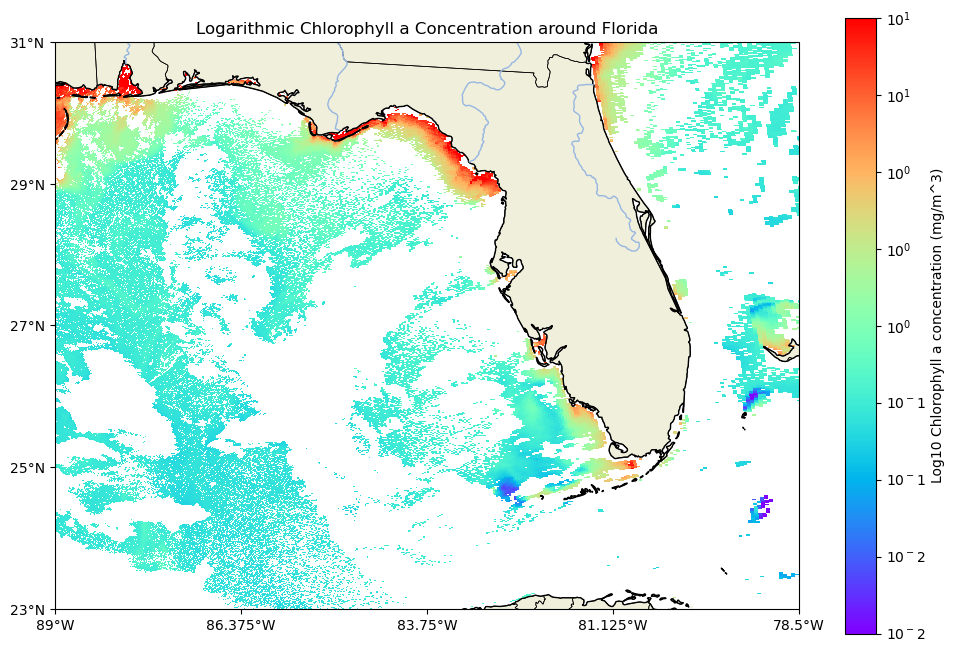

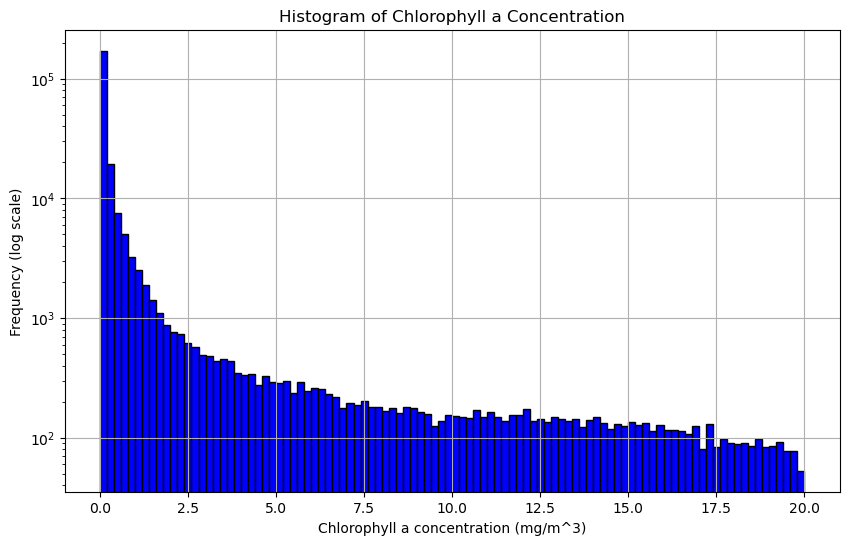

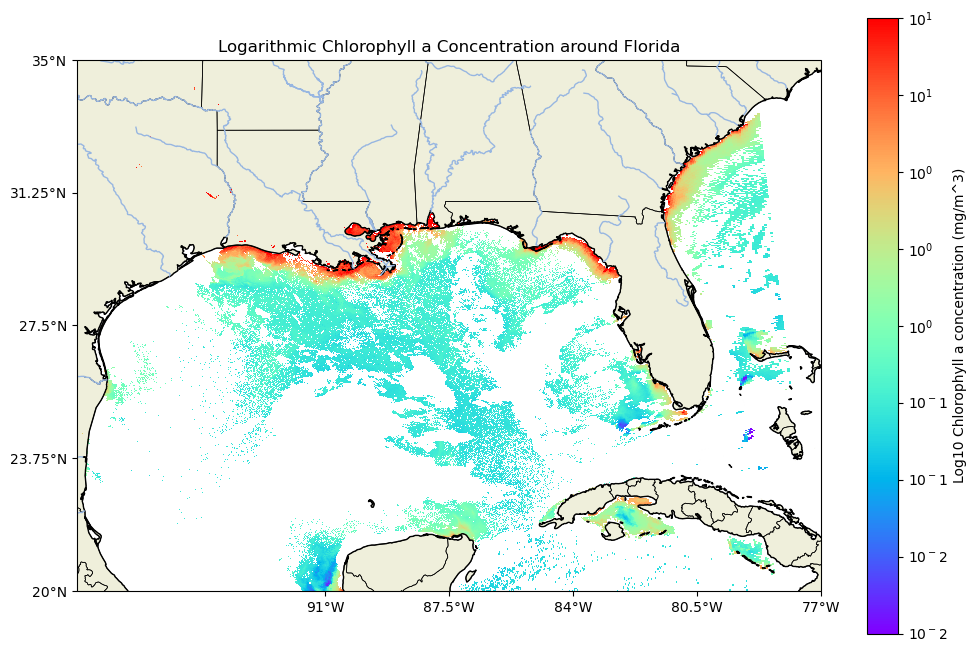

In [25]:
plot_chlora_log_zoom(chlor_a, lon, lat)

plot_chlora_log(chlor_a, lon, lat)


## NASA's **WorldView** can be found at the following [link:](https://worldview.earthdata.nasa.gov/?v=-99.99067756533624,18.857870096514617,-72.74742047589218,32.90845125461138&l=Reference_Labels_15m(hidden),Reference_Features_15m(hidden),Coastlines_15m,OCI_PACE_Chlorophyll_a,VIIRS_NOAA20_CorrectedReflectance_TrueColor(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor(hidden),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor&lg=true&t=2024-06-07-T14%3A54%3A38Z)
---


## NASA WorldView PACE Chlorophyll_a calculations:

![Worldview](https://github.com/Philliec459/STS-Software-to-Download-and-Process-NASA-PACE-Ocean-Ecosystem-hyperspectral-data/blob/main/WorldView.png?raw=1)


## NASA WorldView PACE Chlorophyll_a calculations for May 21, 2024:

![Worldview](https://github.com/Philliec459/STS-Software-to-Download-and-Process-NASA-PACE-Ocean-Ecosystem-hyperspectral-data/blob/main/WorldView2.png?raw=1)

---
# **Interactive Chlorophyll_a plots:**

In [26]:
from ipywidgets import interact, FloatRangeSlider, Layout, FloatSlider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter




def plot_chlora_log_interactive( lon_slide, lat_slide, chla_slide):

    # Take the logarithm of the data
    chl_a_CI_log = np.log10(chlor_a)

    low_lat, high_lat = lat_slide
    low_lon, high_lon = lon_slide
    low_chla, high_chla = chla_slide


     # Plot histogram of the data
    plt.figure(figsize=(9, 1))
    plt.hist(chl_a_CI_log.flatten(), bins=100, range=(low_chla, high_chla),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.xlabel('Chlorophyll a concentration (mg/m^3)')
    plt.ylabel('Frequency (log scale)')
    plt.title('Histogram of Chlorophyll a Concentration')
    plt.grid(True)
    #plt.show()




    # Plot the reflectance
    plt.figure(figsize=(9, 9))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)


    ax.set_extent([low_lon, high_lon, low_lat, high_lat], crs=ccrs.PlateCarree())  # Florida region

    # Add Natural Earth features for the basemap
    ax.add_feature(cfeature.LAND)
    #####ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    #######ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Plot the reflectance data using pcolormesh
    # Plot the reflectance data using pcolormesh with log scale
    im = ax.pcolormesh(lon, lat, chl_a_CI_log, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    #chloa_display = np.where((np.array(chl_a_CI_log) >= low_chla) & (np.array(chl_a_CI_log) <= low_chla), chl_a_CI_log, np.nan)
    #im = ax.pcolormesh(lon, lat, chloa_display, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.STATES, linewidth=0.5)

    # Set ticks and format them
    ax.set_xticks(np.linspace(low_lon, high_lon, 5), crs=map_projection)
    ax.set_yticks(np.linspace(low_lat, high_lat, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)


     # Add colorbar with logarithmic scale
    #cbar = plt.colorbar(im, orientation = 'horizontal', label='Log10 Chlorophyll a concentration (mg/m^3)')
    cbar = plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=40, fraction=0.02, label='Log10 Chlorophyll a concentration (mg/m^3)')

    #cbar.ax.set_yticklabels([f'$10^{int(t)}$' for t in cbar.get_ticks()])
    plt.title('Logarithmic Chlorophyll a Concentration around Florida')
    plt.tight_layout()
    plt.show()



# Define the range sliders for zooming (x and y limits)
lon_slider = FloatRangeSlider(
    value = [-98, -77],
    min = -98,
    max = -77,
    step = .1,
    description='lon:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

lat_slider = FloatRangeSlider(
    value = [20, 35],
    min = 20,
    max = 35,
    step = .1,
    description='lat:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

chlora_slider = FloatRangeSlider(
    value = [-2.6, 1.0],
    min = -5,
    max = 5,
    step = 0.05,
    description='Chlor_a:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)


# Create the interactive widget
chla_interactive = interact(
    plot_chlora_log_interactive,
    lon_slide = lon_slider,
    lat_slide = lat_slider,
    chla_slide = chlora_slider
)


interactive(children=(FloatRangeSlider(value=(-98.0, -77.0), continuous_update=False, description='lon:', layo…

In [27]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

---
---
# **Potential Red Tide Test Indices mentioned in the literature:** - still searching
---

https://sccf.org/blog/2021/11/09/remote-sensing-of-harmful-algal-blooms/#:~:text=The%20more%20orange%20or%20red,indicates%20a%20red%20tide%20bloom.
The more orange or red the pixels, the more chlorophyll-a is present in the water. If medium and high K. brevis concentrations align with high chlorophyll-a fluorescence, it likely indicates a red tide bloom

# **View actual Karenia brevis cell count data from Floriday Fish and Wildlife:**

https://myfwc.com/research/redtide/statewide/

https://myfwc.maps.arcgis.com/apps/View/index.html?appid=87162eec3eb846218cec711d16462a72

# ![image.png](https://github.com/Philliec459/STS-Software-to-Download-and-Process-NASA-PACE-Ocean-Ecosystem-hyperspectral-data/blob/main/KBevis_map.png?raw=1)


**or from National Centers for Environmental Information:**
https://www.ncei.noaa.gov/archive/archive-management-system/OAS/bin/prd/jquery/accession/download/120767



---
Algorithms to be explored to identify red tide and harmful algal blooms (HABs) from PACE hyperspectral data:

**1.  Ocean Color Index (OCI) Algorithms:**

* **NPhy:** Normalized Phytoplankton Index - This algorithm exploits the reflectance difference between phytoplankton and water around 670 nm. Higher NPhy values indicate higher phytoplankton concentration, potentially including red tide blooms.
* **NLI (Normalized Difference Like Index):** Various NLI versions exist, each targeting specific phytoplankton types. NLI_670 can be used for red tide detection by utilizing the reflectance difference around 670 nm.

**2.  Machine Learning Algorithms:**

* **Support Vector Machines (SVM):**  Train an SVM model on a labeled dataset of PACE data with confirmed red tide events. The model can then be used to classify unknown PACE data points as red tide or not.
* **Random Forest:** Similar to SVM, a Random Forest classifier can be trained to identify red tide blooms based on features extracted from your PACE data.

**3.  Dimensionality Reduction Techniques with Classification:**

* **Principal Component Analysis (PCA) followed by Classification:** PCA can reduce the dimensionality of your PACE data while preserving most of the relevant information. Classification algorithms like k-Nearest Neighbors (KNN) or Linear Discriminant Analysis (LDA) can then be applied on the reduced data for red tide detection.

**Additional Considerations:**

* **Incorporate ancillary data:** While these algorithms rely on PACE data,  including environmental parameters like sea surface temperature (SST) or salinity from other sources can improve red tide detection accuracy.
* **Algorithm selection:** The best algorithm depends on the specific characteristics of your red tide events and the  availability of training data.

Here are some resources that you might find helpful:

* PACE Mission  ([https://pace.gsfc.nasa.gov/](https://pace.gsfc.nasa.gov/))
 *  OCI Algorithms for PACE ([https://oceancolor.gsfc.nasa.gov/](https://oceancolor.gsfc.nasa.gov/))
*  Machine Learning for Remote Sensing ([https://www.sciencedirect.com/science/article/pii/S0924271619301108](https://www.sciencedirect.com/science/article/pii/S0924271619301108))



https://oceancolor.gsfc.nasa.gov

https://oceancolor.gsfc.nasa.gov/resources/atbd/

https://www.earthdata.nasa.gov/apt/documents/chlor-a/v1.0#scientific_theory
this is out clhor_a source




In [ ]:
def plot_red_tide(red_tide_mask, lon, lat, method):

    # Plot chlorophyll a concentration on a geospatial plot using Cartopy
    plt.figure(figsize=(12, 8))

    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region

    # Old way
    #plt.contourf(longitudes, latitudes, reflectance_at_target,  vmin=0, vmax=0.03, transform=ccrs.PlateCarree(), cmap='rainbow')
    #plt.contourf(longitudes, latitudes, reflectance_at_target,  vmin=0, vmax=0.03, cmap='rainbow')


    # Plot the reflectance data using pcolormesh
    #im = ax.pcolormesh(lon, lat, chl_a_OCI,  vmin=1.5, vmax=3., cmap='rainbow')
    #im = ax.pcolormesh(lon, lat, red_tide_mask, vmin=0, vmax=50 ,cmap='rainbow')
    im = ax.pcolormesh(lon, lat, red_tide_mask ,vmin=0.01, vmax=1.5 , cmap='Reds')
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-91, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # Plot the data
    #plt.contourf(longitudes, latitudes, chl_a, transform=ccrs.PlateCarree(), cmap='viridis')
    #plt.contourf(lon, lat, chl_a, transform=ccrs.PlateCarree(), cmap='rainbow')
    plt.colorbar(im, label='Red Tide Presence')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.show()

In [ ]:
def Map_red_tide_zoom(red_tide, lon, lat, method):

    # Plot the reflectance
    plt.figure(figsize=(12, 12))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    ax.set_extent([-85, -78.5, 23, 30], crs=ccrs.PlateCarree())  # Florida region


    # Plot the reflectance data using pcolormesh
    #im = ax.pcolormesh(lon, lat, reflectance_at_target,  vmin=0, vmax=0.1, cmap='rainbow')
    im = ax.pcolormesh(lon, lat, red_tide, cmap='rainbow')
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)

    # Set ticks and format them
    ax.set_xticks(np.linspace(-85, -78.5, 5), crs=map_projection)
    ax.set_yticks(np.linspace(23, 30, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    plt.colorbar(im, label='Red Tide Presence')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.show()


In [ ]:

# Define a threshold for identifying high chlorophyll-a concentrations indicative of red tide
chlor_a_threshold = 9.9  # Example threshold value in mg/m^3

# Identify areas with chlor_a above the threshold
red_tide_mask = chl_a_CI > chlor_a_threshold

method = "Chlorophyll_a Threshold of 9.9"

In [ ]:
def plot_chlora_histogram_thresh(red_tide_mask, method):

    # Plot histogram of the data
    plt.figure(figsize=(7, 3))
    plt.hist(red_tide_mask.flatten(), bins=100, range=(0, 2),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.xlabel('Chlorophyll a concentration (mg/m^3)')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of Chlorophyll a Concentration {method}')
    plt.grid(True)
    plt.show()

# Example usage
plot_chlora_histogram_thresh(red_tide_mask, method)


In [ ]:
plot_chlora_log(chl_a_CI, lon, lat)


plot_red_tide(red_tide_mask, lon, lat, method)


Map_red_tide_zoom(red_tide_mask, lon, lat, method)


plot_chlora_log_zoom(chl_a_CI, lon, lat)

# **Key Red Tide Indicator Reflectance Wavelengths mentioned in literature:**
___

    reflectance_ratio = Rrs_665 / Rrs_620

    reflectance_ratio2 = Rrs_678 / Rrs_667

    FLH = Rrs_680 -  (  Rrs_660 + (Rrs_703 - Rrs_660 ) * (680 - 660)/(703 - 660) )                            

    KNDVI = (Rrs_678 - Rrs_667)/(Rrs_678 + Rrs_667)

    KNDVI2 = (Rrs_690 - Rrs_667)/(Rrs_690 + Rrs_667)

    RefDif = (Rrs_690 - Rrs_667)

    key wavelengths = [620, 660, 665, 667, 678, 680, 690, 703]
                    = 620 to 703   for Red Tide indicators mentioned in literature.
                    
    They are all in the reddish portion of the visible spectrum.
___

In [ ]:
from ipywidgets import interact, FloatRangeSlider, Layout, FloatSlider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

def Map_Reflectance_widget_wave(target_wavelength):

    wavelength_index = np.argmin(np.abs(wavelengths - target_wavelength))
    reflectance_at_target = reflectance_data[:, :, wavelength_index]

    print('key wavelengths = 620, 660, 665, 667, 678, 680, 690, 703, but all wavelengths are available from the slider')


    # Plot histogram of the data
    plt.figure(figsize=(12, 4))
    plt.hist(reflectance_at_target.flatten(), bins=100, range=(0.001, 0.02),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.ylim(100,10000)
    plt.xlabel(f'Reflectance')
    plt.ylabel('Frequency')
    plt.title(f'Reflectance at {target_wavelength} nm')
    plt.grid(True)
    plt.show()






# Define the range sliders for zooming (x and y limits)
lon_slider = FloatRangeSlider(
    value = [-98, -77],
    min = -98,
    max = -77,
    step = .1,
    description='lon:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

lat_slider = FloatRangeSlider(
    value = [20, 35],
    min = 20,
    max = 35,
    step = 1,
    description='lat:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

# Define the available wavelengths
available_wavelengths = np.array([315, 316, 318, 320, 322, 325, 327, 329, 331, 334, 337, 339, 341, 344, 346, 348, 351, 353,
                                  356, 358, 361, 363, 366, 368, 371, 373, 375, 378, 380, 383, 385, 388, 390, 393, 395, 398,
                                  400, 403, 405, 408, 410, 413, 415, 418, 420, 422, 425, 427, 430, 432, 435, 437, 440, 442,
                                  445, 447, 450, 452, 455, 457, 460, 462, 465, 467, 470, 472, 475, 477, 480, 482, 485, 487,
                                  490, 492, 495, 497, 500, 502, 505, 507, 510, 512, 515, 517, 520, 522, 525, 527, 530, 532,
                                  535, 537, 540, 542, 545, 547, 550, 553, 555, 558, 560, 563, 565, 568, 570, 573, 575, 578,
                                  580, 583, 586, 588, 591, 593, 596, 598, 601, 603, 605, 608, 610, 613, 615, 618, 620, 623,
                                  625, 627, 630, 632, 635, 637, 640, 641, 642, 643, 645, 646, 647, 648, 650, 651, 652, 653,
                                  655, 656, 657, 658, 660, 661, 662, 663, 665, 666, 667, 668, 670, 671, 672, 673, 675, 676,
                                  677, 678, 679, 681, 682, 683, 684, 686, 687, 688, 689, 691, 692, 693, 694, 696, 697, 698,
                                  699, 701, 702, 703])



key_available_wavelengths = np.array(  [620, 623,625, 627, 630, 632, 635, 637, 640, 641, 642, 643, 645, 646, 647, 648, 650,
                                        651, 652, 653,655, 656, 657, 658, 660, 661, 662, 663, 665, 666, 667, 668, 670, 671,
                                        672, 673, 675, 676,677, 678, 679, 681, 682, 683, 684, 686, 687, 688, 689, 691, 692,
                                        693, 694, 696, 697, 698, 699, 701, 702, 703])


# Create the wavelength selection slider
wave_slider = widgets.SelectionSlider(
    options=available_wavelengths,
    value=315,
    description='Wavelength:',
    continuous_update=True,
    layout=Layout(width='50%')  # Adjust width of the slider
)

# Create the interactive widget
ndvi_interactive = interact(
    Map_Reflectance_widget_wave,
    #range_values=ndvi_range_slider,
    target_wavelength = wave_slider
)


# Heatmap at all wavelengths for all PACE data:

### **These work great, but they are turned off because they take a long time to run.**

# Interactive

# 3D

## Reflectance Ratio of 665/620:
---

In [ ]:
# Identify indices for the required bands
band_620 = np.argmin(np.abs(wavelengths - 620))
band_665 = np.argmin(np.abs(wavelengths - 665))

print("Band 620 index:", band_620)
print("Band 665 index:", band_665)

# Extract reflectance values at the required wavelengths
Rrs_620 = reflectance_data[:, :, band_620]
Rrs_665 = reflectance_data[:, :, band_665]


# Calculate a custom reflectance ratio (e.g., red to green reflectance)
#reflectance_ratio = band_665 / band_620
reflectance_ratio = Rrs_665 / Rrs_620

# Apply a threshold to identify potential red tide areas
#threshold = 1.5  # Example threshold value for the reflectance ratio
#red_tide_mask2 = reflectance_ratio > threshold

method = "reflectance_ratio = Rrs_665 / Rrs_620"

In [ ]:
def plot_chlora_histogram_ratio(reflectance_ratio, method):

    # Plot histogram of the data
    plt.figure(figsize=(7, 3))
    plt.hist(reflectance_ratio.flatten(), bins=100, range=(-10, 10),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.xlabel('Chlorophyll a concentration (mg/m^3)')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of  {method}')
    plt.grid(True)
    plt.show()

# Example usage
plot_chlora_histogram_ratio(reflectance_ratio, method)


In [ ]:
def plot_red_tide_ratio(reflectance_ratio, lon, lat, method):

    # Plot chlorophyll a concentration on a geospatial plot using Cartopy
    plt.figure(figsize=(12, 8))

    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region


    # Plot the reflectance data using pcolormesh
    #im = ax.pcolormesh(lon, lat, chl_a_OCI,  vmin=1.5, vmax=3., cmap='rainbow')
    #im = ax.pcolormesh(lon, lat, red_tide_mask, vmin=0, vmax=50 ,cmap='rainbow')
    im = ax.pcolormesh(lon, lat, reflectance_ratio ,vmin=0, vmax=1.5 , cmap='rainbow')
    #im = ax.pcolormesh(lon, lat, reflectance_ratio , cmap='rainbow')
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-91, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # Plot the data
    #plt.contourf(longitudes, latitudes, chl_a, transform=ccrs.PlateCarree(), cmap='viridis')
    #plt.contourf(lon, lat, chl_a, transform=ccrs.PlateCarree(), cmap='rainbow')
    plt.colorbar(im, label='Red Tide Presence Reflectance Ratio')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.show()




In [ ]:
def Map_red_tide_zoom2(red_tide, lon, lat, method):

    # Plot the reflectance
    plt.figure(figsize=(12, 12))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    ax.set_extent([-89, -78.5, 23, 31], crs=ccrs.PlateCarree())  # Florida region


    # Plot the reflectance data using pcolormesh
    #im = ax.pcolormesh(lon, lat, reflectance_at_target,  vmin=0, vmax=0.1, cmap='rainbow')
    im = ax.pcolormesh(lon, lat, red_tide, vmin=0, vmax=1.5 , cmap='rainbow')
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)

    # Set ticks and format them
    ax.set_xticks(np.linspace(-89, -78.5, 5), crs=map_projection)
    ax.set_yticks(np.linspace(23, 31, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    plt.colorbar(im, label='Red Tide Presence')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.show()


In [ ]:
plot_chlora_log(chl_a_CI, lon, lat)

plot_red_tide_ratio(reflectance_ratio, lon, lat, method)

Map_red_tide_zoom2(reflectance_ratio, lon, lat, method)

plot_chlora_log_zoom(chl_a_CI, lon, lat)

# **Interactive Potential Red Tide plots reflectance_ratio = Rrs_665 / Rrs_620:**
---

In [ ]:
from ipywidgets import interact, FloatRangeSlider, Layout, FloatSlider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter




def plot_chlora_log_reflect( lon_slide, lat_slide, FLH_slide, method):

    # Take the logarithm of the data
    #chl_a_CI_log = np.log10(chl_a_CI)

    low_lat, high_lat = lat_slide
    low_lon, high_lon = lon_slide
    low_chla, high_chla = FLH_slide


     # Plot histogram of the data
    plt.figure(figsize=(10, 1))
    plt.hist(reflectance_ratio.flatten(), bins=100, range=(low_chla, high_chla),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.ylabel('Frequency (log scale)')
    plt.xlabel(f'Potential Red Tide Areas from {method}')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.grid(True)
    #plt.show()




    # Plot the reflectance
    plt.figure(figsize=(9, 9))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)


    ax.set_extent([low_lon, high_lon, low_lat, high_lat], crs=ccrs.PlateCarree())  # Florida region

    # Add Natural Earth features for the basemap
    ax.add_feature(cfeature.LAND)
    #####ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    #######ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Plot the reflectance data using pcolormesh
    # Plot the reflectance data using pcolormesh with log scale
    im = ax.pcolormesh(lon, lat, reflectance_ratio, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    #chloa_display = np.where((np.array(chl_a_CI_log) >= low_chla) & (np.array(chl_a_CI_log) <= low_chla), chl_a_CI_log, np.nan)
    #im = ax.pcolormesh(lon, lat, chloa_display, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.STATES, linewidth=0.5)

    # Set ticks and format them
    ax.set_xticks(np.linspace(low_lon, high_lon, 5), crs=map_projection)
    ax.set_yticks(np.linspace(low_lat, high_lat, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    plt.title(f'Potential Red Tide Areas from {method}')
    cbar = plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=40, fraction=0.02, label="")
    #plt.title('Logarithmic Chlorophyll a Concentration around Florida')
    plt.tight_layout()
    plt.show()



# Define the range sliders for zooming (x and y limits)
lon_slider = FloatRangeSlider(
    value = [-98, -77],
    min = -98,
    max = -77,
    step = .1,
    description='lon:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

lat_slider = FloatRangeSlider(
    value = [20, 35],
    min = 20,
    max = 35,
    step = .1,
    description='lat:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

FLH_slider = FloatRangeSlider(
    value = [0, 1.55],
    min = -20,
    max = 20 ,
    step = 0.001,
    description='RefDif:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)


# Create the interactive widget
chla_interactive = interact(
    plot_chlora_log_reflect,
    #range_values=ndvi_range_slider,
    lon_slide = lon_slider,
    lat_slide = lat_slider,
    FLH_slide = FLH_slider,
    method = method
)


## Reflectance Ratio of 678/667:
---

Novel_Optical_Techniques_for_Detecting_and_Classif.pdf

    Ruhul Amin, Jing Zhou, Alex Gilerson, Barry Gross, Fred Moshary, and Samir Ahmed, Novel optical techniques for detecting and classifying toxic dinoflagellate Karenia brevis blooms using satellite imagery,Optical Remote Sensing Laboratory, the City College of the City University of New York, 140th St @ Convent Ave, New York, NY, 10031,USA




In [ ]:
# Identify indices for the required bands
band_667 = np.argmin(np.abs(wavelengths - 667))
band_678 = np.argmin(np.abs(wavelengths - 678))

print("Band 667 index:", band_667)
print("Band 678 index:", band_678)

# Extract reflectance values at the required wavelengths
Rrs_667 = reflectance_data[:, :, band_667]
Rrs_678 = reflectance_data[:, :, band_678]


# Calculate a custom reflectance ratio (e.g., red to green reflectance)
#reflectance_ratio = band_665 / band_620
reflectance_ratio2 = Rrs_678 / Rrs_667



# Apply a threshold to identify potential red tide areas
#threshold = 1.5  # Example threshold value for the reflectance ratio
#red_tide_mask3 = reflectance_ratio > threshold

method = "reflectance_ratio2 = Rrs_678 / Rrs_667"

In [ ]:
def plot_chlora_histogram_ratio(reflectance_ratio, method):

    # Plot histogram of the data
    plt.figure(figsize=(7, 3))
    plt.hist(reflectance_ratio.flatten(), bins=100, range=(-20, 20),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.xlabel('Chlorophyll a concentration (mg/m^3)')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of {method}')
    plt.grid(True)
    plt.show()

# Example usage
plot_chlora_histogram_ratio(reflectance_ratio2, method)


In [ ]:
# Apply a threshold to identify potential red tide areas
threshold = 4  # Example threshold value for the reflectance ratio
red_tide_mask3 = reflectance_ratio2 > threshold


In [ ]:
def plot_red_tide_ratio(red_tide_mask3 , lon, lat, method):

    # Plot chlorophyll a concentration on a geospatial plot using Cartopy
    plt.figure(figsize=(12, 8))

    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region


    # Plot the reflectance data using pcolormesh
    #im = ax.pcolormesh(lon, lat, chl_a_OCI,  vmin=1.5, vmax=3., cmap='rainbow')
    #im = ax.pcolormesh(lon, lat, red_tide_mask, vmin=0, vmax=50 ,cmap='rainbow')
    #im = ax.pcolormesh(lon, lat, red_tide_mask3 ,vmin=0, vmax=1.5 , cmap='rainbow')
    im = ax.pcolormesh(lon, lat, red_tide_mask3  , cmap='rainbow')
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-91, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # Plot the data
    #plt.contourf(longitudes, latitudes, chl_a, transform=ccrs.PlateCarree(), cmap='viridis')
    #plt.contourf(lon, lat, chl_a, transform=ccrs.PlateCarree(), cmap='rainbow')
    plt.colorbar(im, label='Red Tide Presence Reflectance Ratio')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.show()



In [ ]:
plot_chlora_log(chl_a_CI, lon, lat)

plot_red_tide_ratio(red_tide_mask3, lon, lat, method)

Map_red_tide_zoom(red_tide_mask3, lon, lat, method)

plot_chlora_log_zoom(chl_a_CI, lon, lat)

# **Interactive Potential Red Tide plots reflectance_ratio2 = Rrs_678 / Rrs_667:**
---

In [ ]:
from ipywidgets import interact, FloatRangeSlider, Layout, FloatSlider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter




def plot_chlora_log_reflectance2( lon_slide, lat_slide, FLH_slide, method):

    # Take the logarithm of the data
    #chl_a_CI_log = np.log10(chl_a_CI)

    low_lat, high_lat = lat_slide
    low_lon, high_lon = lon_slide
    low_chla, high_chla = FLH_slide


     # Plot histogram of the data
    plt.figure(figsize=(10, 1))
    plt.hist(reflectance_ratio2.flatten(), bins=100, range=(low_chla, high_chla),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.ylabel('Frequency (log scale)')
    plt.xlabel(f'Potential Red Tide Areas from {method}')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.grid(True)
    #plt.show()




    # Plot the reflectance
    plt.figure(figsize=(9, 9))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)


    ax.set_extent([low_lon, high_lon, low_lat, high_lat], crs=ccrs.PlateCarree())  # Florida region

    # Add Natural Earth features for the basemap
    ax.add_feature(cfeature.LAND)
    #####ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    #######ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Plot the reflectance data using pcolormesh
    # Plot the reflectance data using pcolormesh with log scale
    im = ax.pcolormesh(lon, lat, reflectance_ratio2, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    #chloa_display = np.where((np.array(chl_a_CI_log) >= low_chla) & (np.array(chl_a_CI_log) <= low_chla), chl_a_CI_log, np.nan)
    #im = ax.pcolormesh(lon, lat, chloa_display, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.STATES, linewidth=0.5)

    # Set ticks and format them
    ax.set_xticks(np.linspace(low_lon, high_lon, 5), crs=map_projection)
    ax.set_yticks(np.linspace(low_lat, high_lat, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    plt.title(f'Potential Red Tide Areas from {method}')
    cbar = plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=40, fraction=0.02, label="")
    #plt.title('Logarithmic Chlorophyll a Concentration around Florida')
    plt.tight_layout()
    plt.show()



# Define the range sliders for zooming (x and y limits)
lon_slider = FloatRangeSlider(
    value = [-98, -77],
    min = -98,
    max = -77,
    step = .1,
    description='lon:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

lat_slider = FloatRangeSlider(
    value = [20, 35],
    min = 20,
    max = 35,
    step = .1,
    description='lat:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

FLH_slider = FloatRangeSlider(
    value = [-5, 5],
    min = -20,
    max = 20 ,
    step = 0.001,
    description='Ratio:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)


# Create the interactive widget
chla_interactive = interact(
    plot_chlora_log_reflectance2,
    #range_values=ndvi_range_slider,
    lon_slide = lon_slider,
    lat_slide = lat_slider,
    FLH_slide = FLH_slider,
    method = method
)


In [ ]:
# Identify indices for the required bands
band_667 = np.argmin(np.abs(wavelengths - 667))
band_678 = np.argmin(np.abs(wavelengths - 678))

print("Band 667 index:", band_667)
print("Band 678 index:", band_678)

# Extract reflectance values at the required wavelengths
Rrs_667 = reflectance_data[:, :, band_667]
Rrs_678 = reflectance_data[:, :, band_678]


# Calculate a custom reflectance ratio (e.g., red to green reflectance)
#reflectance_ratio = band_665 / band_620
Kbrev_dif = Rrs_678 - Rrs_667



# Apply a threshold to identify potential red tide areas
#threshold = 1.5  # Example threshold value for the reflectance ratio
#red_tide_mask3 = reflectance_ratio > threshold

method = "Kbrev_dif = Rrs_678 - Rrs_667"

In [ ]:
from ipywidgets import interact, FloatRangeSlider, Layout, FloatSlider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter




def plot_chlora_log_diff( lon_slide, lat_slide, FLH_slide, method):

    # Take the logarithm of the data
    #chl_a_CI_log = np.log10(chl_a_CI)

    low_lat, high_lat = lat_slide
    low_lon, high_lon = lon_slide
    low_chla, high_chla = FLH_slide


     # Plot histogram of the data
    plt.figure(figsize=(10, 1))
    plt.hist(Kbrev_dif.flatten(), bins=100, range=(low_chla, high_chla),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.ylabel('Frequency (log scale)')
    plt.xlabel(f'Potential Red Tide Areas from {method}')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.grid(True)
    #plt.show()




    # Plot the reflectance
    plt.figure(figsize=(9, 9))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)


    ax.set_extent([low_lon, high_lon, low_lat, high_lat], crs=ccrs.PlateCarree())  # Florida region

    # Add Natural Earth features for the basemap
    ax.add_feature(cfeature.LAND)
    #####ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    #######ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Plot the reflectance data using pcolormesh
    # Plot the reflectance data using pcolormesh with log scale
    im = ax.pcolormesh(lon, lat, Kbrev_dif, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    #chloa_display = np.where((np.array(chl_a_CI_log) >= low_chla) & (np.array(chl_a_CI_log) <= low_chla), chl_a_CI_log, np.nan)
    #im = ax.pcolormesh(lon, lat, chloa_display, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.STATES, linewidth=0.5)

    # Set ticks and format them
    ax.set_xticks(np.linspace(low_lon, high_lon, 5), crs=map_projection)
    ax.set_yticks(np.linspace(low_lat, high_lat, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    plt.title(f'Potential Red Tide Areas from {method}')
    cbar = plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=40, fraction=0.02, label="")
    #plt.title('Logarithmic Chlorophyll a Concentration around Florida')
    plt.tight_layout()
    plt.show()



# Define the range sliders for zooming (x and y limits)
lon_slider = FloatRangeSlider(
    value = [-98, -77],
    min = -98,
    max = -77,
    step = .1,
    description='lon:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

lat_slider = FloatRangeSlider(
    value = [20, 35],
    min = 20,
    max = 35,
    step = .1,
    description='lat:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

FLH_slider = FloatRangeSlider(
    value = [-.01, .01],
    min = -.02,
    max = .02 ,
    step = 0.001,
    description='Ratio:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)


# Create the interactive widget
chla_interactive = interact(
    plot_chlora_log_diff,
    #range_values=ndvi_range_slider,
    lon_slide = lon_slider,
    lat_slide = lat_slider,
    FLH_slide = FLH_slider,
    method = method
)


# Remote Sensing Fluorescence Line Height:
---

    Zhao, M.; Bai, Y.; Li, H.; He, X.; Gong, F.; Li, T. Fluorescence Line Height Extraction Algorithm for the Geostationary Ocean Color Imager. RemoteSens.2022,14,2511. https:// doi.org/10.3390/rs14112511
    
    
    FLH algorithm for GOCI was computed as FLH =
    h (       ) i
     Rrs(745)−Rrs(660) × ] (whereRrs(660()6,8R0−rs6(660)80),andRrs(745)aretheremote
    Rrs(680) − Rrs(660) + (R  r s ( 7 4 5) ) − Rrs(660)) × (745−660) (where Rrs(660), Rrs(680), and sensing reflectances at 660, 680, and 745 nm, respectively). The algorithm using FL

    FLH = Rrs(680) - (Rrs(660) + (Rrs(745) - Rrs(660)) * (680 - 660)/(745 - 660))
    
 FLH = Rrs_680 -  (  Rrs_660 + (Rrs_700 - Rrs_660 ) * (680 - 660)/(700 - 660) )                            
   

In [ ]:
# Identify indices for the required bands
band_660 = np.argmin(np.abs(wavelengths - 660))
band_680 = np.argmin(np.abs(wavelengths - 680))
band_703 = np.argmin(np.abs(wavelengths - 703))

print("Band 660 index:", band_660)
print("Band 680 index:", band_680)
print("Band 703 index:", band_703)

# Extract reflectance values at the required wavelengths
Rrs_660 = reflectance_data[:, :, band_660]
Rrs_680 = reflectance_data[:, :, band_680]
Rrs_703 = reflectance_data[:, :, band_703]


#RefDif = (Rrs_690 - Rrs_667)
#KNDVI = (Rrs_667 - Rrs_678)/(Rrs_678 + Rrs_667)
#FLH = Rrs(680) - (Rrs(660) + (Rrs(745) - Rrs(660) * (680 - 660)/(745 - 660)
FLH = Rrs_680 -  (  Rrs_660 + (Rrs_703 - Rrs_660 ) * (680 - 660)/(703 - 660) )

# Calculate a custom reflectance ratio (e.g., red to green reflectance)
#reflectance_ratio = band_665 / band_620
#reflectance_ratio2 = Rrs_678 / Rrs_667

# Apply a threshold to identify potential red tide areas
#threshold = 1.5  # Example threshold value for the reflectance ratio
#red_tide_mask3 = reflectance_ratio > threshold

method = 'FLH = Rrs_680 - (Rrs_660 + (Rrs_703 - Rrs_660 ) * (680 - 660)/(703 - 660))'

In [ ]:
def plot_chlora_histogram_FLH(FLH, method):

    # Plot histogram of the data
    plt.figure(figsize=(7, 3))
    plt.hist(FLH.flatten(), bins=100, range=(-.02, .02),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.xlabel('Chlorophyll a concentration (mg/m^3)')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of {method}')
    plt.grid(True)
    plt.show()

# Example usage
plot_chlora_histogram_FLH(FLH, method)


In [ ]:
def plot_red_tide_FLH(FLH, lon, lat, method):

    # Plot chlorophyll a concentration on a geospatial plot using Cartopy
    plt.figure(figsize=(12, 8))

    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region

    # Plot the reflectance data using pcolormesh
    #im = ax.pcolormesh(lon, lat, chl_a_OCI,  vmin=1.5, vmax=3., cmap='rainbow')
    #im = ax.pcolormesh(lon, lat, red_tide_mask, vmin=0, vmax=50 ,cmap='rainbow')
    im = ax.pcolormesh(lon, lat, FLH , cmap='rainbow')
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-91, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # Plot the data
    #plt.contourf(longitudes, latitudes, chl_a, transform=ccrs.PlateCarree(), cmap='viridis')
    #plt.contourf(lon, lat, chl_a, transform=ccrs.PlateCarree(), cmap='rainbow')
    plt.colorbar(im, label='Red Tide Presence RFLH')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.show()




In [ ]:
plot_chlora_log(chl_a_CI, lon, lat)


plot_red_tide_FLH(FLH, lon, lat, method)


Map_red_tide_zoom(FLH, lon, lat, method)

plot_chlora_log_zoom(chl_a_CI, lon, lat)

# **Interactive Potential Red Tide plots FLH = Rrs_680 -  (  Rrs_660 + (Rrs_703 - Rrs_660 ) * (680 - 660)/(703 - 660) )                         :**
---

In [ ]:
from ipywidgets import interact, FloatRangeSlider, Layout, FloatSlider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter




def plot_chlora_log_FLH( lon_slide, lat_slide, FLH_slide, method):

    # Take the logarithm of the data
    #chl_a_CI_log = np.log10(chl_a_CI)

    low_lat, high_lat = lat_slide
    low_lon, high_lon = lon_slide
    low_chla, high_chla = FLH_slide


     # Plot histogram of the data
    plt.figure(figsize=(10, 1))
    plt.hist(FLH.flatten(), bins=100, range=(low_chla, high_chla),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.ylabel('Frequency (log scale)')
    plt.xlabel(f'Potential Red Tide Areas from {method}')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.grid(True)




    # Plot the reflectance
    plt.figure(figsize=(9, 9))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)


    ax.set_extent([low_lon, high_lon, low_lat, high_lat], crs=ccrs.PlateCarree())  # Florida region

    # Add Natural Earth features for the basemap
    ax.add_feature(cfeature.LAND)
    #####ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    #######ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Plot the reflectance data using pcolormesh
    # Plot the reflectance data using pcolormesh with log scale
    im = ax.pcolormesh(lon, lat, FLH, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    #chloa_display = np.where((np.array(chl_a_CI_log) >= low_chla) & (np.array(chl_a_CI_log) <= low_chla), chl_a_CI_log, np.nan)
    #im = ax.pcolormesh(lon, lat, chloa_display, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.STATES, linewidth=0.5)

    # Set ticks and format them
    ax.set_xticks(np.linspace(low_lon, high_lon, 5), crs=map_projection)
    ax.set_yticks(np.linspace(low_lat, high_lat, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    plt.title(f'Potential Red Tide Areas from {method}')
    cbar = plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=40, fraction=0.02, label="")
    #plt.title('Logarithmic Chlorophyll a Concentration around Florida')
    plt.tight_layout()
    plt.show()




# Define the range sliders for zooming (x and y limits)
lon_slider = FloatRangeSlider(
    value = [-98, -77],
    min = -98,
    max = -77,
    step = .1,
    description='lon:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

lat_slider = FloatRangeSlider(
    value = [20, 35],
    min = 20,
    max = 35,
    step = .1,
    description='lat:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

FLH_slider = FloatRangeSlider(
    value = [-0.01, 0.005],
    min = -0.1,
    max = 0.1 ,
    step = 0.001,
    description='FLH:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)



# Create the interactive widget
chla_interactive = interact(
    plot_chlora_log_FLH,
    #range_values=ndvi_range_slider,
    lon_slide = lon_slider,
    lat_slide = lat_slider,
    FLH_slide = FLH_slider,
    method = method
)


# KNDVI:
---

In [ ]:
# Identify indices for the required bands
band_667 = np.argmin(np.abs(wavelengths - 667))
band_678 = np.argmin(np.abs(wavelengths - 678))

print("Band 667 index:", band_667)
print("Band 678 index:", band_678)

# Extract reflectance values at the required wavelengths
Rrs_667 = reflectance_data[:, :, band_667]
Rrs_678 = reflectance_data[:, :, band_678]

KNDVI = (Rrs_678 - Rrs_667)/(Rrs_678 + Rrs_667)
#KNDVI = (Rrs_667 - Rrs_678)/(Rrs_678 + Rrs_667)

#KNDVI = np.max(KNDVI) - KNDVI

# Calculate a custom reflectance ratio (e.g., red to green reflectance)
#reflectance_ratio = band_665 / band_620
#reflectance_ratio2 = Rrs_678 / Rrs_667

# Apply a threshold to identify potential red tide areas
#threshold = 1.5  # Example threshold value for the reflectance ratio
#red_tide_mask3 = reflectance_ratio > threshold

method = 'KNDVI = (Rrs_678 - Rrs_667)/(Rrs_678 + Rrs_667)'

In [ ]:
def plot_chlora_histogram_KNDVI(KNDVI, method):

    # Plot histogram of the data
    plt.figure(figsize=(7, 3))
    plt.hist(KNDVI.flatten(), bins=100, range=(-10, 10),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.xlabel('Chlorophyll a concentration (mg/m^3)')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of {method}')
    plt.grid(True)
    plt.show()

# Example usage
plot_chlora_histogram_KNDVI(KNDVI, method)


In [ ]:
def plot_red_tide_kndvi(kndvi, lon, lat, method):

    # Plot chlorophyll a concentration on a geospatial plot using Cartopy
    plt.figure(figsize=(12, 8))

    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region

    # Plot the reflectance data using pcolormesh
    #im = ax.pcolormesh(lon, lat, chl_a_OCI,  vmin=1.5, vmax=3., cmap='rainbow')
    #im = ax.pcolormesh(lon, lat, red_tide_mask, vmin=0, vmax=50 ,cmap='rainbow')
    im = ax.pcolormesh(lon, lat, kndvi  , cmap='rainbow')
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-91, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # Plot the data
    #plt.contourf(longitudes, latitudes, chl_a, transform=ccrs.PlateCarree(), cmap='viridis')
    #plt.contourf(lon, lat, chl_a, transform=ccrs.PlateCarree(), cmap='rainbow')
    plt.colorbar(im, label='Red Tide Presence Reflectance Ratio')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.show()




In [ ]:
plot_chlora_log(chl_a_CI, lon, lat)


plot_red_tide_kndvi(KNDVI, lon, lat, method)

Map_red_tide_zoom(KNDVI, lon, lat, method)

plot_chlora_log_zoom(chl_a_CI, lon, lat)

# **Interactive Potential Red Tide plots KNDVI:**
---

In [ ]:
from ipywidgets import interact, FloatRangeSlider, Layout, FloatSlider
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter




def plot_chlora_log_KNDVI( lon_slide, lat_slide, KNDVI_slide, method):

    # Take the logarithm of the data
    #chl_a_CI_log = np.log10(chl_a_CI)

    low_lat, high_lat = lat_slide
    low_lon, high_lon = lon_slide
    low_chla, high_chla = KNDVI_slide


     # Plot histogram of the data
    plt.figure(figsize=(10, 1))
    plt.hist(KNDVI.flatten(), bins=100, range=(low_chla, high_chla),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.ylabel('Frequency (log scale)')
    plt.xlabel(f'Potential Red Tide Areas from {method}')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.grid(True)




    # Plot the reflectance
    plt.figure(figsize=(9, 9))
    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)


    ax.set_extent([low_lon, high_lon, low_lat, high_lat], crs=ccrs.PlateCarree())  # Florida region

    # Add Natural Earth features for the basemap
    ax.add_feature(cfeature.LAND)
    #####ax.add_feature(cfeature.OCEAN)
    #####ax.add_feature(cfeature.COASTLINE)
    #####ax.add_feature(cfeature.BORDERS, linestyle=':')
    #######ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Plot the reflectance data using pcolormesh
    # Plot the reflectance data using pcolormesh with log scale
    im = ax.pcolormesh(lon, lat, KNDVI, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    #chloa_display = np.where((np.array(chl_a_CI_log) >= low_chla) & (np.array(chl_a_CI_log) <= low_chla), chl_a_CI_log, np.nan)
    #im = ax.pcolormesh(lon, lat, chloa_display, vmin=low_chla, vmax=high_chla, cmap='rainbow')


    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.STATES, linewidth=0.5)

    # Set ticks and format them
    ax.set_xticks(np.linspace(low_lon, high_lon, 5), crs=map_projection)
    ax.set_yticks(np.linspace(low_lat, high_lat, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)


    plt.title(f'Potential Red Tide Areas from {method}')
    cbar = plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=40, fraction=0.02, label="")
    #plt.title('Logarithmic Chlorophyll a Concentration around Florida')
    plt.tight_layout()
    plt.show()



# Define the range sliders for zooming (x and y limits)
lon_slider = FloatRangeSlider(
    value = [-98, -77],
    min = -98,
    max = -77,
    step = .1,
    description='lon:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

lat_slider = FloatRangeSlider(
    value = [20, 35],
    min = 20,
    max = 35,
    step = .1,
    description='lat:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

KNDVI_slider = FloatRangeSlider(
    value = [-2, 2],
    min = -10.0,
    max = 10.0 ,
    step = 0.01,
    description='KNDVI:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)


# Create the interactive widget
chla_interactive = interact(
    plot_chlora_log_KNDVI,
    #range_values=ndvi_range_slider,
    lon_slide = lon_slider,
    lat_slide = lat_slider,
    KNDVI_slide = KNDVI_slider,
    method = method
)


# Misc. methods:
---

These are other methods mentioned on the web, but consider this work in progress.

In [ ]:
# Identify indices for the required bands
band_667 = np.argmin(np.abs(wavelengths - 667))
band_690 = np.argmin(np.abs(wavelengths - 690))

print("Band 667 index:", band_667)
print("Band 690 index:", band_690)

# Extract reflectance values at the required wavelengths
Rrs_667 = reflectance_data[:, :, band_667]
Rrs_690 = reflectance_data[:, :, band_690]

KNDVI2 = (Rrs_690 - Rrs_667)/(Rrs_690 + Rrs_667)
#KNDVI = (Rrs_667 - Rrs_678)/(Rrs_678 + Rrs_667)

#KNDVI = np.max(KNDVI) - KNDVI

# Calculate a custom reflectance ratio (e.g., red to green reflectance)
#reflectance_ratio = band_665 / band_620
#reflectance_ratio2 = Rrs_678 / Rrs_667

# Apply a threshold to identify potential red tide areas
#threshold = 1.5  # Example threshold value for the reflectance ratio
#red_tide_mask3 = reflectance_ratio > threshold

method = 'KNDVI2 = (Rrs_690 - Rrs_667)/(Rrs_690 + Rrs_667)'

In [ ]:
def plot_chlora_histogram_KNDVI2(KNDVI2, method):

    # Plot histogram of the data
    plt.figure(figsize=(7, 3))
    plt.hist(KNDVI2.flatten(), bins=100, range=(-100, 100),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.xlabel('Chlorophyll a concentration (mg/m^3)')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of {method}')
    plt.grid(True)
    plt.show()

# Example usage
plot_chlora_histogram_KNDVI2(KNDVI2, method)


In [ ]:
def plot_red_tide_kndvi(kndvi, lon, lat, method):

    # Plot chlorophyll a concentration on a geospatial plot using Cartopy
    plt.figure(figsize=(12, 8))

    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region


    # Plot the reflectance data using pcolormesh
    #im = ax.pcolormesh(lon, lat, chl_a_OCI,  vmin=1.5, vmax=3., cmap='rainbow')
    #im = ax.pcolormesh(lon, lat, red_tide_mask, vmin=0, vmax=50 ,cmap='rainbow')
    im = ax.pcolormesh(lon, lat, kndvi  , cmap='rainbow')
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-91, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # Plot the data
    #plt.contourf(longitudes, latitudes, chl_a, transform=ccrs.PlateCarree(), cmap='viridis')
    #plt.contourf(lon, lat, chl_a, transform=ccrs.PlateCarree(), cmap='rainbow')
    plt.colorbar(im, label='Red Tide Presence Reflectance Ratio')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.show()




In [ ]:
plot_chlora_log(chl_a_CI, lon, lat)


plot_red_tide_kndvi(KNDVI2, lon, lat, method)

Map_red_tide_zoom(KNDVI, lon, lat, method)

plot_chlora_log_zoom(chl_a_CI, lon, lat)

In [ ]:
# Identify indices for the required bands
band_667 = np.argmin(np.abs(wavelengths - 667))
band_690 = np.argmin(np.abs(wavelengths - 690))

print("Band 667 index:", band_667)
print("Band 690 index:", band_690)

# Extract reflectance values at the required wavelengths
Rrs_667 = reflectance_data[:, :, band_667]
Rrs_690 = reflectance_data[:, :, band_690]

RefDif = (Rrs_690 - Rrs_667)
#KNDVI = (Rrs_667 - Rrs_678)/(Rrs_678 + Rrs_667)

#KNDVI = np.max(KNDVI) - KNDVI

# Calculate a custom reflectance ratio (e.g., red to green reflectance)
#reflectance_ratio = band_665 / band_620
#reflectance_ratio2 = Rrs_678 / Rrs_667

# Apply a threshold to identify potential red tide areas
#threshold = 1.5  # Example threshold value for the reflectance ratio
#red_tide_mask3 = reflectance_ratio > threshold

method = 'RefDif = (Rrs_690 - Rrs_667)'


In [ ]:
def plot_chlora_histogram_RefDif(RefDif, method):

    # Plot histogram of the data
    plt.figure(figsize=(7, 3))
    plt.hist(KNDVI2.flatten(), bins=100, range=(-10, 10),color='blue', edgecolor='black')
    plt.yscale('log')  # Use log scale for y-axis to better visualize distribution
    plt.xlabel('Chlorophyll a concentration (mg/m^3)')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of {method}')
    plt.grid(True)
    plt.show()

# Example usage
plot_chlora_histogram_RefDif(RefDif, method)


In [ ]:
def plot_red_tide_kndvi(RefDif, lon, lat, method):

    # Plot chlorophyll a concentration on a geospatial plot using Cartopy
    plt.figure(figsize=(12, 8))

    map_projection = ccrs.PlateCarree()
    ax = plt.axes(projection=map_projection)
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-98, -77, 20, 35], crs=ccrs.PlateCarree())  # Florida region

    # Old way
    #plt.contourf(longitudes, latitudes, reflectance_at_target,  vmin=0, vmax=0.03, transform=ccrs.PlateCarree(), cmap='rainbow')
    #plt.contourf(longitudes, latitudes, reflectance_at_target,  vmin=0, vmax=0.03, cmap='rainbow')


    # Plot the reflectance data using pcolormesh
    #im = ax.pcolormesh(lon, lat, chl_a_OCI,  vmin=1.5, vmax=3., cmap='rainbow')
    #im = ax.pcolormesh(lon, lat, red_tide_mask, vmin=0, vmax=50 ,cmap='rainbow')
    im = ax.pcolormesh(lon, lat, RefDif , cmap='rainbow')
    ax.coastlines(resolution='10m')
    ax.add_feature(cartopy.feature.STATES, linewidth=0.5)


    # Set ticks and format them
    ax.set_xticks(np.linspace(-91, -77, 5), crs=map_projection)
    ax.set_yticks(np.linspace(20, 35, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # Plot the data
    #plt.contourf(longitudes, latitudes, chl_a, transform=ccrs.PlateCarree(), cmap='viridis')
    #plt.contourf(lon, lat, chl_a, transform=ccrs.PlateCarree(), cmap='rainbow')
    plt.colorbar(im, label='Red Tide Presence Reflectance Ratio')
    plt.title(f'Potential Red Tide Areas from {method}')
    plt.show()




In [ ]:
plot_chlora_log(chl_a_CI, lon, lat)


plot_red_tide_kndvi(RefDif, lon, lat, method)


Map_red_tide_zoom(KNDVI, lon, lat, method)

plot_chlora_log_zoom(chl_a_CI, lon, lat)